In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
Path = 'drive/My Drive'

In [3]:
import numpy as np
import pandas as pd

In [4]:
file1=pd.read_csv (Path+'/key_2.csv')
file2=pd.read_csv(Path+'/sample_submission_2.csv')

In [5]:
file1=file1.merge(file2,on='Id')

In [6]:
file1.head()

,Page,Id,Visits
0,007_スペクター_ja.wikipedia.org_all-access_all-agen...,0b293039387a,0
1,007_スペクター_ja.wikipedia.org_all-access_all-agen...,7114389dd824,0
2,007_スペクター_ja.wikipedia.org_all-access_all-agen...,057b02ff1f09,0
3,007_スペクター_ja.wikipedia.org_all-access_all-agen...,bd2aca21caa3,0
4,007_スペクター_ja.wikipedia.org_all-access_all-agen...,c0effb42cdd5,0


In [7]:
file1.shape

(8993906, 3)

In [8]:
file1['Page'].unique

<bound method Series.unique of 0          007_スペクター_ja.wikipedia.org_all-access_all-agen...
1          007_スペクター_ja.wikipedia.org_all-access_all-agen...
2          007_スペクター_ja.wikipedia.org_all-access_all-agen...
3          007_スペクター_ja.wikipedia.org_all-access_all-agen...
4          007_スペクター_ja.wikipedia.org_all-access_all-agen...
                                 ...                        
8993901    龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...
8993902    龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...
8993903    龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...
8993904    龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...
8993905    龙生九子_zh.wikipedia.org_mobile-web_all-agents_20...
Name: Page, Length: 8993906, dtype: object>

In [9]:
file1['Page'].values[0]

'007_スペクター_ja.wikipedia.org_all-access_all-agents_2017-09-13'

In [10]:
file2.head()

,Id,Visits
0,0b293039387a,0
1,7114389dd824,0
2,057b02ff1f09,0
3,bd2aca21caa3,0
4,c0effb42cdd5,0


In [11]:
from operator import add
import seaborn as sns
from scipy import fft
import matplotlib.pyplot as plt
from tqdm.notebook import tnrange
from tqdm import tqdm
from statsmodels.graphics.tsaplots import plot_acf
import datetime 
import calendar
import re

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
train_data=pd.read_csv(Path+'/train_2.csv')

In [13]:
train_data.shape

(145063, 804)

In [14]:
# Let's check null values 
train_data.isna().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2017-09-06     1775
2017-09-07     3467
2017-09-08     1061
2017-09-09     3332
2017-09-10     5578
Length: 804, dtype: int64

In [15]:
Page_name=train_data['Page']  #This variable will be used extensively in order to divide the dataset to make different type of groups.

In [16]:
Page_name

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
                                ...                        
145058    Underworld_(serie_de_películas)_es.wikipedia.o...
145059    Resident_Evil:_Capítulo_Final_es.wikipedia.org...
145060    Enamorándome_de_Ramón_es.wikipedia.org_all-acc...
145061    Hasta_el_último_hombre_es.wikipedia.org_all-ac...
145062    Francisco_el_matemático_(serie_de_televisión_d...
Name: Page, Length: 145063, dtype: object

**Filling missing values**

In [17]:
# When data is missing only for few days because the data was not recorded, we will use linear interpolation to fill that data.
train_data=train_data.drop(columns=['Page']).interpolate(axis=1)

In [18]:
train_data.isna().sum()

2015-07-01    20740
2015-07-02    19767
2015-07-03    19256
2015-07-04    18983
2015-07-05    18818
              ...  
2017-09-06        0
2017-09-07        0
2017-09-08        0
2017-09-09        0
2017-09-10        0
Length: 803, dtype: int64

In [19]:
train_data.fillna(0,inplace=True)

In [20]:
train_data.isna().sum()

2015-07-01    0
2015-07-02    0
2015-07-03    0
2015-07-04    0
2015-07-05    0
             ..
2017-09-06    0
2017-09-07    0
2017-09-08    0
2017-09-09    0
2017-09-10    0
Length: 803, dtype: int64

In [21]:
train_data.insert(loc=0,column='Page',value=Page_name)

In [22]:
print(train_data.shape)
train_data.tail(10)

(145063, 804)


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
145053,Drake_(músico)_es.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,6.0,2.0,1.0,2.0,5.0,2.0,3.0,6.0,5.0,1.0,6.0,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,1.0,4.0,62.0,6.0,5.0,5.0,4.0,6.0,5.0,1.0,1.0,3.0,1.0,3.0,2.0,2.0,0.0,5.0,7.0,1.0
145054,Skam_(serie_de_televisión)_es.wikipedia.org_al...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,7.0,4.0,4.0,6.0,6.0,3.0,8.0,7.0,5.0,5.0,6.0,9.0,0.0,10.0,5.0,5.0,4.0,6.0,3.0,3.0,13.0,19.0,9.0,7.0,8.0,11.0,10.0,10.0,13.0,4.0,10.0,8.0,5.0,5.0,4.0,8.0,7.0,7.0,19.0
145055,Legión_(serie_de_televisión)_es.wikipedia.org_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,2.0,0.0,2.0,2.0,4.0,2.0,2.0,1.0,3.0,3.0,1.0,5.0,3.0,0.0,4.0,2.0,2.0,4.0,1.0,8.0,7.0,5.0,2.0,8.0,1.0,5.0,6.0,3.0,3.0,1.0,4.0,2.0,1.0,5.0,3.0,4.0,3.0,3.0
145056,Doble_tentación_es.wikipedia.org_all-access_sp...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,37.0,9.0,21.0,23.0,7.0,12.0,6.0,7.0,11.0,6.0,7.0,8.0,5.0,5.0,4.0,7.0,7.0,9.0,7.0,4.0,10.0,14.0,23.0,9.0,19.0,4.0,12.0,19.0,21.0,9.0,51.0,13.0,6.0,25.0,19.0,7.0,14.0,12.0,8.0
145057,Mi_adorable_maldición_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,9.0,9.0,6.0,5.0,10.0,3.0,25.0,5.0,10.0,5.0,3.0,2.0,5.0,8.0,3.0,7.0,6.0,5.0,8.0,5.0,8.0,10.0,10.0,10.0,7.0,7.0,10.0,6.0,10.0,5.0,5.0,11.0,6.0,9.0,8.0,7.0,9.0,11.0,5.0
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,7.0,6.0,8.0,5.0,7.0,7.0,7.0,8.0,2.0,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,6.0,1.0,2.0,3.0,3.0,18.0,4.0,5.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,9.0,10.0,8.0,6.0,3.0,9.0,2.0,11.0,3.0,3.0,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,11.0,9.0,10.0,11.0,13.0,7.0,8.0,13.0,8.0,14.0,4.0,10.0,8.0,8.0,13.0,14.0,7.0,5.0,9.0,9.0,16.0,10.0,12.0,10.0,13.0,10.0,21.0,11.0,9.0,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,Hasta_el_último_hombre_es.wiki

**EXPLORATORY DATA ANALYSIS**

Based on language of wikipedia

In [23]:
# Extracting language of the page from it's name and adding it to a set so that we only have unique entry and can easily find out the total number of languages in dataset
lang=set()
for k in Page_name:
  index=k.find('.wikipedia')
  lang.add(k[index-1:index-3:-1][::-1])

In [24]:
lang

{'de', 'en', 'es', 'fr', 'ja', 'nt', 'ru', 'zh'}

These two letter words corresponds to different languages:
de-German, en-English, es-Spanish, fr-French, ja-Japanese, ru-Russia, zh-Chinese, nt refers to media pages(wikimedia)

In [25]:
# Creating a list which contains 8 list(total number of laguage + wikimedia) and filling each list with 803 zeros as we have data for total 803 days
lang_list=list(lang)
data_list=[]
for i in range(len(lang_list)):
  data_list.append(np.zeros(train_data.shape[1]-1))

In [26]:
# Checking language of each page and accordingly adding the data of same language
for i in tnrange(len(Page_name)):
  index=Page_name[i].find('.wikipedia')
  temp=lang_list.index(Page_name[i][index-1:index-3:-1][::-1])
  add_list=train_data.iloc[i].values[1:]
  data_list[temp]=list(map(add,data_list[temp],add_list))
  #lang_number[temp]=lang_number[temp] + 1
# now, data_list has 8 lists, each of which has 803 numbers which represent the total traffic on that particular language for 803 days and one list for wikimedia.

In [27]:
lang_data=pd.DataFrame(data_list,index=lang_list,columns=train_data.columns.values[1:])
lang_data.head(10)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
ru,9463854.0,9.627679e+06,8.923491e+06,8.393279e+06,8.938585e+06,9.629063e+06,9.408504e+06,9.364151e+06,9.592358e+06,1.098494e+07,1.011422e+07,1.118758e+07,1.153856e+07,1.118451e+07,1.070463e+07,1.091602e+07,1.078012e+07,9.664625e+06,1.070470e+07,1.098367e+07,1.068965e+07,1.043380e+07,9.376811e+06,8.320551e+06,7.588041e+06,8.476626e+06,9.160619e+06,8.826167e+06,8.653378e+06,8.441760e+06,8.292005e+06,7.427501e+06,8.288868e+06,1.052042e+07,1.106697e+07,1.058363e+07,1.064010e+07,1.063795e+07,9.743116e+06,1.018383e+07,...,9.015312e+06,9.116633e+06,9.038403e+06,8.719694e+06,8.878097e+06,9.086024e+06,9.228005e+06,8.930441e+06,9.176677e+06,8.684375e+06,8.751703e+06,9.283854e+06,9.512297e+06,9.716195e+06,1.095725e+07,1.012725e+07,9.188263e+06,9.134529e+06,9.322734e+06,9.301787e+06,9.044684e+06,8.894822e+06,8.732241e+06,9.291629e+06,9.394134e+06,1.035282e+07,1.022748e+07,9.773339e+06,8.994980e+06,8.952075e+06,9.709236e+06,9.632897e+06,9.969264e+06,9.605905e+06,1.164126e+07,1.513207e+07,1.062166e+07,9195616.0,9359213.0,10230383.0
de,13299837.0,1.314242e+07,1.261541e+07,1.157352e+07,1.347039e+07,1.481479e+07,1.434800e+07,1.461195e+07,1.402002e+07,1.307500e+07,1.206361e+07,1.430543e+07,1.561357e+07,1.487936e+07,1.394261e+07,1.376579e+07,1.425938e+07,1.673892e+07,1.574542e+07,1.441624e+07,1.347784e+07,1.382810e+07,1.339262e+07,1.267391e+07,1.261451e+07,1.315823e+07,1.410173e+07,1.396919e+07,1.395664e+07,1.331848e+07,1.286011e+07,1.224839e+07,1.269893e+07,1.314772e+07,1.395455e+07,1.335765e+07,1.355919e+07,1.385186e+07,1.275856e+07,1.392414e+07,...,1.147044e+07,1.152428e+07,1.161495e+07,1.184189e+07,1.277189e+07,1.256431e+07,1.228578e+07,1.172194e+07,1.237542e+07,1.204531e+07,1.141470e+07,1.219175e+07,1.266282e+07,1.407629e+07,1.216005e+07,1.193613e+07,1.130567e+07,1.068387e+07,1.219308e+07,1.212816e+07,1.146776e+07,1.133964e+07,1.140664e+07,1.107783e+07,1.009732e+07,1.144883e+07,1.229847e+07,1.174162e+07,1.206214e+07,1.276259e+07,1.377195e+07,1.161139e+07,1.282334e+07,1.290129e+07,1.256124e+07,1.452796e+07,1.817293e+07,11885967.5,11045738.5,12297360.0
nt,1451216.0,1.500411e+06,1.415762e+06,1.208134e+06,1.319721e+06,1.530057e+06,1.645994e+06,1.664654e+06,1.490766e+06,1.502152e+06,1.153058e+06,1.195056e+06,1.396622e+06,1.559351e+06,1.601412e+06,1.579440e+06,1.647824e+06,1.488018e+06,1.432164e+06,1.458815e+06,1.749868e+06,1.809522e+06,1.630879e+06,1.555435e+06,1.392347e+06,1.355504e+06,1.699958e+06,1.624535e+06,1.716919e+06,1.657843e+06,2.452597e+06,1.593395e+06,2.943440e+06,1.606127e+06,1.866461e+06,1.920463e+06,2.118303e+06,2.061300e+06,2.393653e+06,1.892962e+06,...,2.000598e+06,2.436536e+06,3.015553e+06,1.736324e+06,1.753381e+06,2.172253e+06,1.923777e+06,1.838809e+06,1.885704e+06,1.863492e+06,1.793000e+06,2.952865e+06,2.876088e+06,6.198428e+06,3.295974e+06,2.682435e+06,2.829966e+06,1.934559e+06,2.598988e+06,3.800049e+06,2.103513e+06,3.060567e+06,2.000663e+06,2.417688e+06,1.847443e+06,2.078835e+06,2.435234e+06,2.246737e+06,2.922816e+06,3.647717e+06,4.345884e+06,2.541452e+06,3.143460e+06,3.021847e+06,2.723707e+06,6.745965e+06,1.045159e+07,2381036.5,2451720.0,2191754.0
ja,11

As we have constructed our data based on language. Now we will plot the daily traffic on each language.

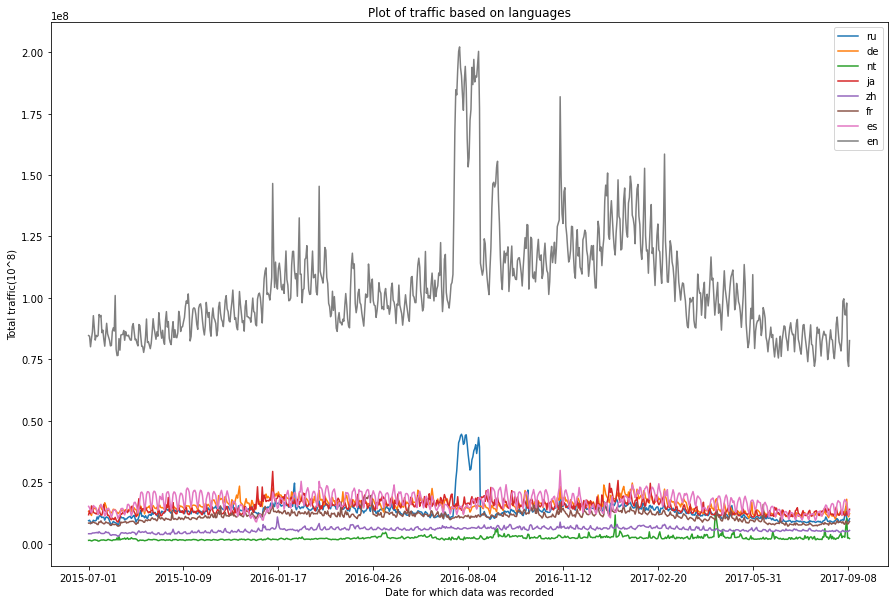

In [28]:
# Plotting the traffic of each language on a single plot to understand their scale
lang_data.transpose().plot(figsize=(15,10),title='Plot of traffic based on languages')
plt.xlabel('Date for which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()


As anyone would have expected, English wikipedia has the largest traffic of all languages but there is a pattern around August 2016 nd interestingly Russian wikipedia has the same pattern during same time. There is also a pattern around January 2016 in English wikipedia and there some spikes can also be seen in Japanese wiki during the same period.

Conclusion- There is difference in traffic based on language of the data.

Now plot for each language separately 

Plot for daily traffic on Spanish Wikipedia

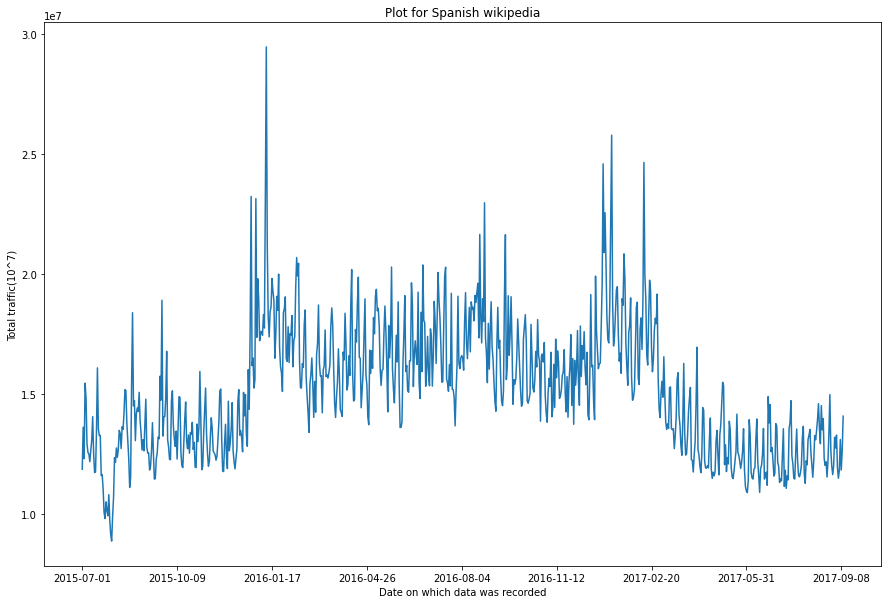

In [29]:
# Now, we will plot individual plot for every language to understand them in deep.
lang_data.iloc[3].transpose().plot(figsize=(15,10),title='Plot for Spanish wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

We can see the nice weekly pattern in the data,regular spikes are there after 7 days and one interesting observation from this plot is that traffic usually goes down during late Q3 or early Q4 and in November 2016, it has a very large spike.

Conclusion-Data has weekly seasonality

Next plot is a correlation plot for traffic on Spanish language wikipedia.



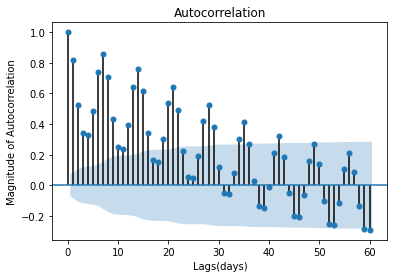

In [30]:
# We will also plot corelation function for each language in order to understand the seasonality. 
x=plot_acf(lang_data.transpose().es,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

This plot shows a high corelation value for 7 days lag, so there is a weekly trand in the data.

Conclusion- We can conclude that using a lag of 7 days in our AR model can produce good results for Spanish language.


Next plot is for frequency and amplitude of Spanish language wikipedia traffic.

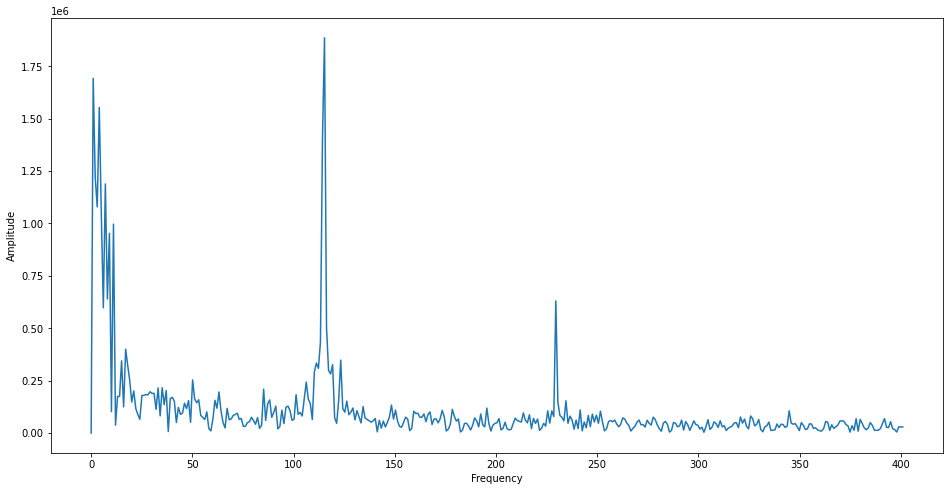

In [31]:
# Lets take a look at our data in frequency domain, we will use Fast Fourier transformation for that.

data=lang_data.transpose().es.values[1:] # This is the data that we are going to transform to analyse the frequency domain
data=data-np.mean(data) # At frequency bin 0, we get the mean value of our signal. In order to remove that we are subtracting mean of the data from every datapoint
x=fft.fft(data) #Fourier Transformation
freq=np.linspace(0,803//2,803//2) # According to shannon, we can only analyse the frequency of half of the sample, this function creates evenly spaced numbers which will be used as frequency in plot
y=2/803*np.abs(x[0:803//2]) # Taking absolute values of half data points 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

This plot shows peak at 120 and 230 days which shows quarterly periodicity. Small peaks can be seen regularly, this can be because of the fact that 7 days lag shows high corelation.

Conclusion- These peaks represents that there is quarterly seasonality in Spanish data.

Next plot is for daily traffic on English wikipedia.

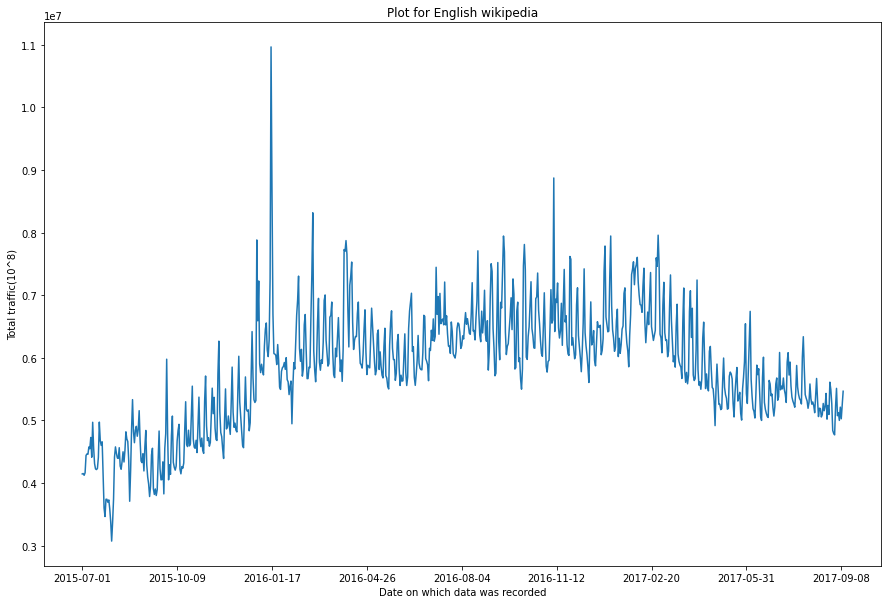

In [32]:
lang_data.iloc[4].transpose().plot(figsize=(15,10),title='Plot for English wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()

For the first few months there are only 1 or 2 spikes in the data but after that spikes can be seen regularly and we can see that after Feb 2017, traffic has gone down by a large margin.

Next plot is for autocorrelation of traffic on English Wikipedia.

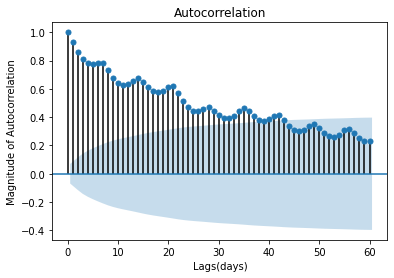

In [33]:
x=plot_acf(lang_data.transpose().en,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

This also shows high corelation value for 7 days lag. After that auto corelation value is for 7,14,21,28..... days is always higher than other days corelation which shows a strong weekly trend.

Conclusion- There is high weekly seasonality.

Next plot is for frequency and amplitude of traffic on English Wikipedia.

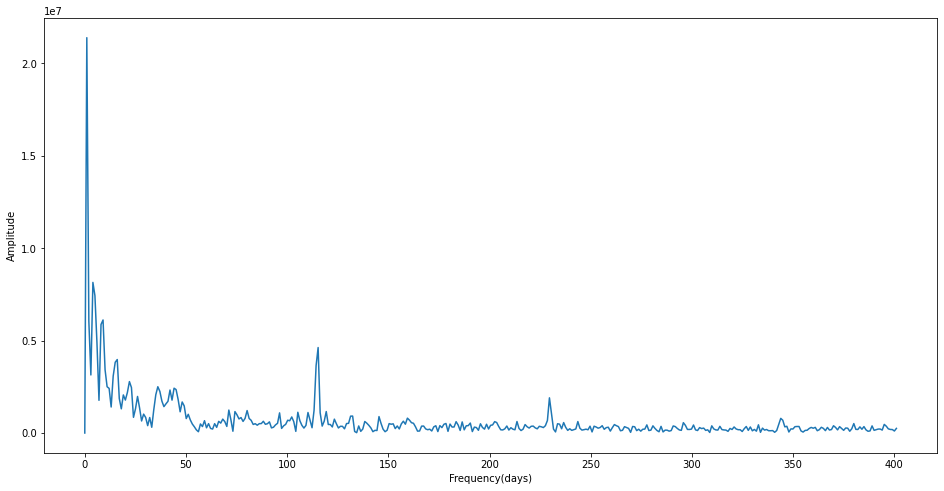

In [34]:
data=lang_data.transpose().en.values[1:] # This is the data that we are going to transform to analyse the frequency domain
data=data-np.mean(data) # At frequency bin 0, we get the mean value of our signal. In order to remove that we are subtracting mean of the data from every datapoint
x=fft.fft(data) #Fourier Transformation
freq=np.linspace(0,803//2,803//2) # According to shannon, we can only analyse the frequency of half of the sample, this function creates evenly spaced numbers which will be used as frequency in plot
y=2/803*np.abs(x[0:803//2]) # Taking absolute values of half data points 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

This also has peaks around same time like the previous one. Regular small peaks can also be seen. Conclusion- Just like Spanish , this also has quarterly seasonality.

Next plot is for daily traffic on Russian language wikipedia.

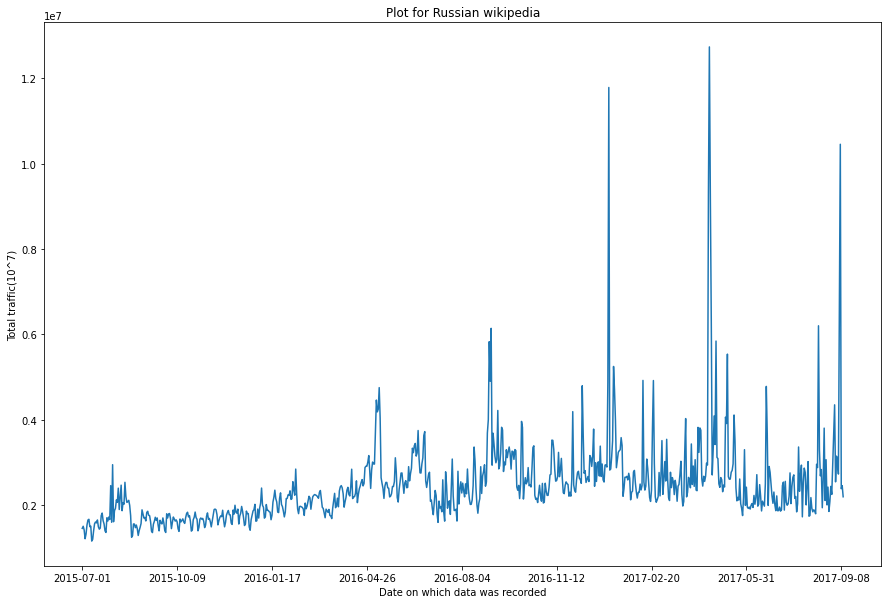

In [35]:
lang_data.iloc[2].transpose().plot(figsize=(15,10),title='Plot for Russian wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

Russian Wikipedia does not show a large upward or downward trend but there is a very large spike during Q3 2016. Other than that it has few spikes here and there but not as much as other languages.

Next plot is for autocorrelation for Russian wikipedia.

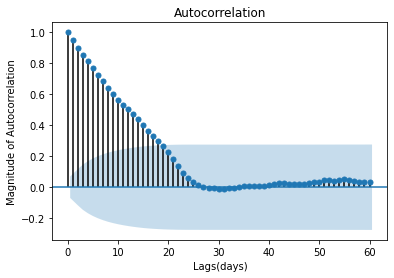

In [36]:
x=plot_acf(lang_data.transpose().ru,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

This one is quite different than other plots, auto corelation value is decreasing regularly. Using lag of 7 days in this case might not be a good idea, lag of 1 or 2 days can provide better results. We will look at other language plots too and then decide the optimal lag value for our complete dataset.

Conclusion- This shows that people in Russia doesn't care about weekends and there rate of accessing the wikipedia pages remains uniform.

Next plot is for frequency and amplitude of traffic on Russian Wikipedia.

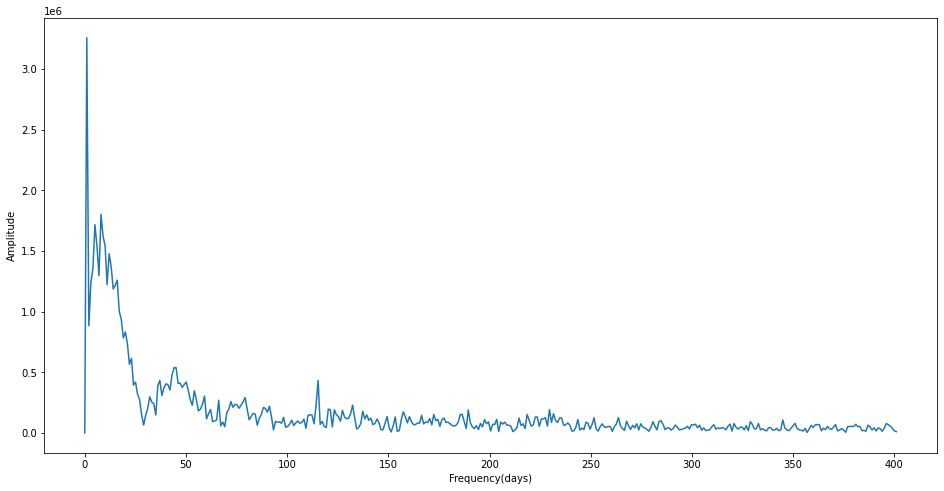

In [37]:
data=lang_data.transpose().ru.values[1:] # This is the data that we are going to transform to analyse the frequency domain
data=data-np.mean(data) # At frequency bin 0, we get the mean value of our signal. In order to remove that we are subtracting mean of the data from every datapoint
x=fft.fft(data) #Fourier Transformation
freq=np.linspace(0,803//2,803//2) # According to shannon, we can only analyse the frequency of half of the sample, this function creates evenly spaced numbers which will be used as frequency in plot
y=2/803*np.abs(x[0:803//2]) # Taking absolute values of half data points 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

This has a peak at 120 days but no major peak is seen at 230 days. 

Conclusion- Russian wikipedia doesn't show much seasonality.

Next plot is for daily traffic on media pages on wikipedia.

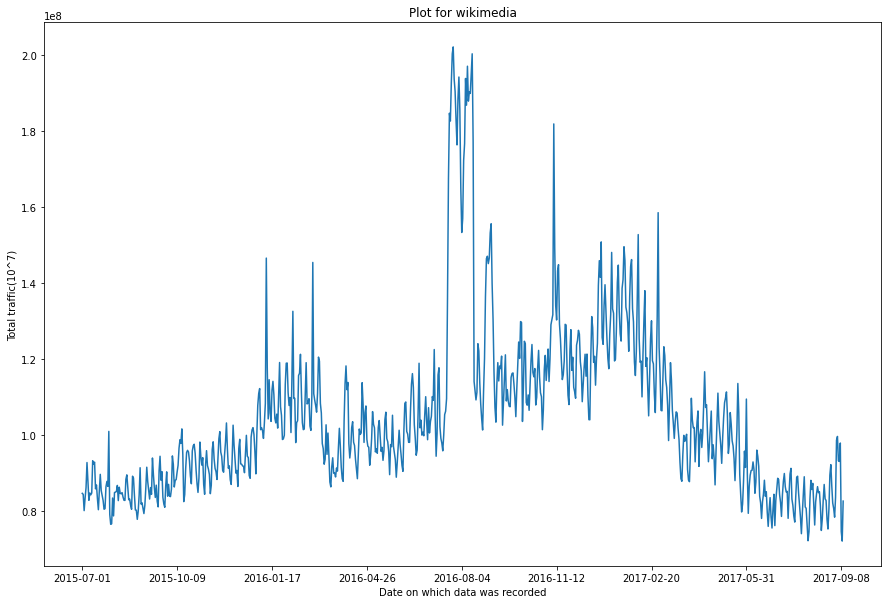

In [38]:
lang_data.iloc[7].transpose().plot(figsize=(15,10),title='Plot for wikimedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

This plot is for media pages like images. We can see that till April 2016, data doesn't show any spikes and after that it has regular spikes and there are also some very large spikes

Next plot is for autocorrelation for media pages on wikipedia.

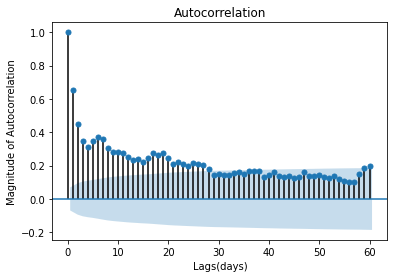

In [39]:
x=plot_acf(lang_data.transpose().nt,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

This one also has better corelation for 1 or 2 days lag but notice that lag of 7 days is higher in comparision to 5,6 or 8,9 days lag.

Conclusion- It also shows some weekly seasonality but not as much as others.

Next plot is of frequency and amplitude of traffic on media pages on wikipedia.

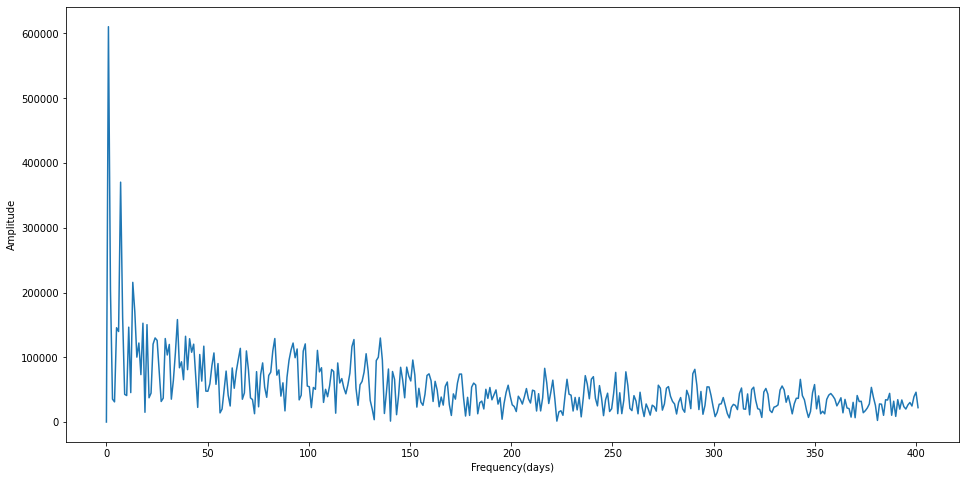

In [40]:
data=lang_data.transpose().nt.values[1:] # This is the data that we are going to transform to analyse the frequency domain
data=data-np.mean(data) # At frequency bin 0, we get the mean value of our signal. In order to remove that we are subtracting mean of the data from every datapoint
x=fft.fft(data) #Fourier Transformation
freq=np.linspace(0,803//2,803//2) # According to shannon, we can only analyse the frequency of half of the sample, this function creates evenly spaced numbers which will be used as frequency in plot
y=2/803*np.abs(x[0:803//2]) # Taking absolute values of half data points 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

Regular peaks are there in the data but no large peaks like in the previous graphs. 

Conclusion- We can see that there is no seasonality in the media pages

Next plot is for daily traffic on Japanese wikipedia.

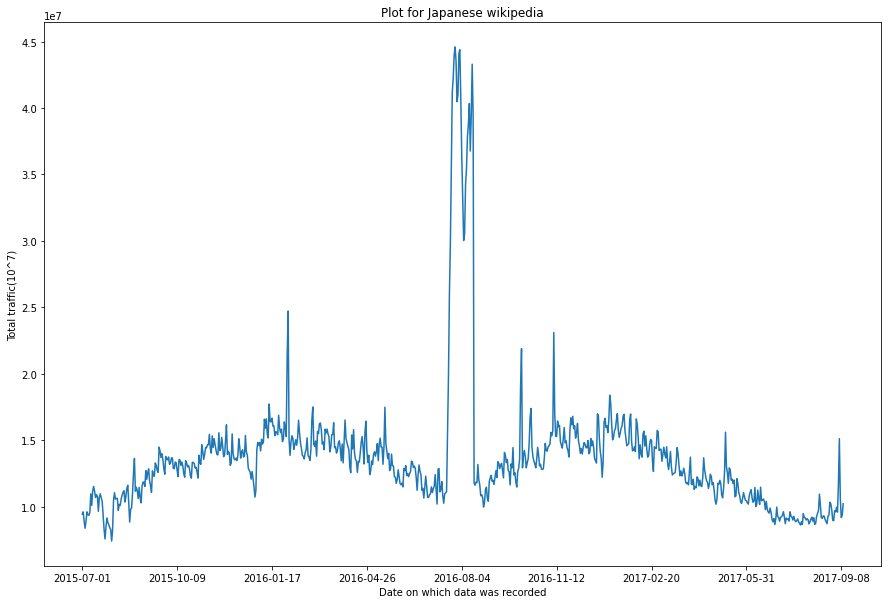

In [41]:
lang_data.iloc[0].transpose().plot(figsize=(15,10),title='Plot for Japanese wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

Japanese wikipedia show some large spikes during January 2016 and we can see that traffic has gone down by a very large margin during September 2015 and there is also a downward trend in data after Feb 2017.

Next plot is for autocorrelation of traffic on Japanese wikipedia.

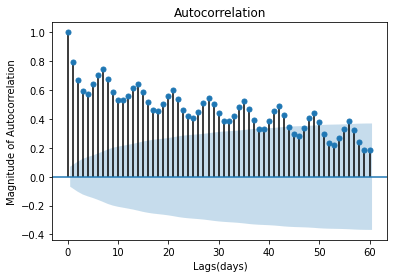

In [42]:
x=plot_acf(lang_data.transpose().ja,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

Similar to some other language plots, it also has good corelation for 7 days lag.

Conclusion- There is weekly seasonality in the data.

Next plot is for frequency and amplitude of traffic on Japanese wikipedia.

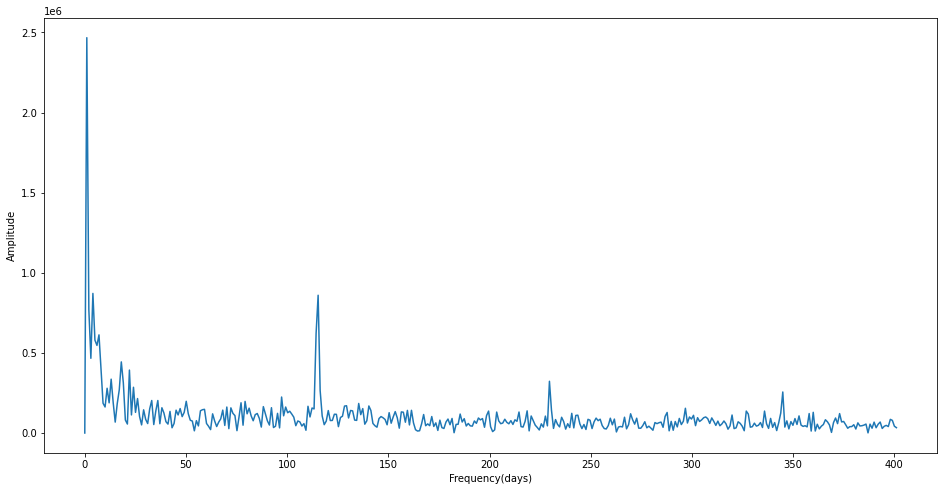

In [43]:
data=lang_data.transpose().ja.values[1:] # This is the data that we are going to transform to analyse the frequency domain
data=data-np.mean(data) # At frequency bin 0, we get the mean value of our signal. In order to remove that we are subtracting mean of the data from every datapoint
x=fft.fft(data) #Fourier Transformation
freq=np.linspace(0,803//2,803//2) # According to shannon, we can only analyse the frequency of half of the sample, this function creates evenly spaced numbers which will be used as frequency in plot
y=2/803*np.abs(x[0:803//2]) # Taking absolute values of half data points 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

It is very similar to the plots we saw initially, peaks at 120 and 230 days.

Conclusion- Data has seasonality for 120 days.

Next plot is for daily traffic on German language wikipedia.

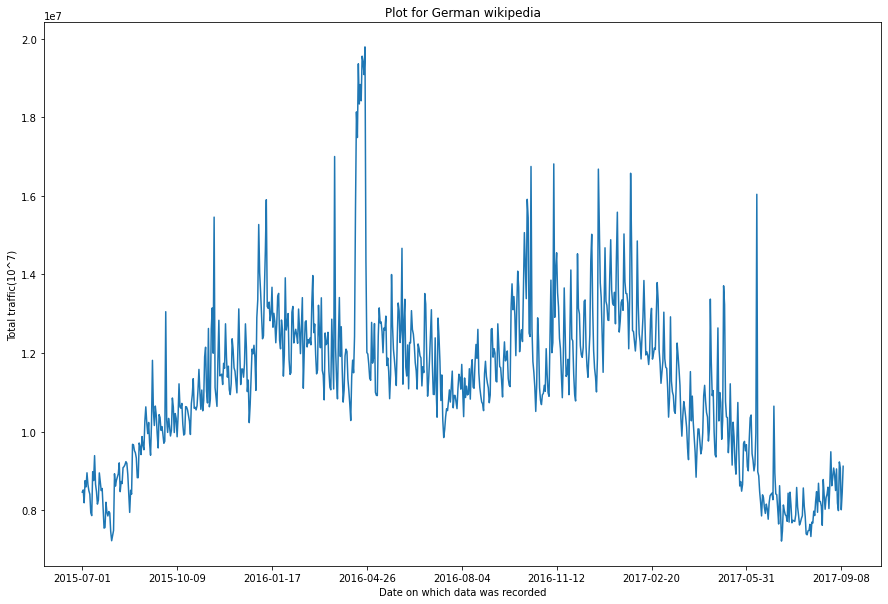

In [44]:
lang_data.iloc[5].transpose().plot(figsize=(15,10),title='Plot for German wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

German Wikipedia has the most number of spikes among all the languages. We can see that this makes 'M' shaped like structure, goes upward then downward and again upward then again downward.

Next plot is for autocorrelation of daily traffic on German Wikipedia.

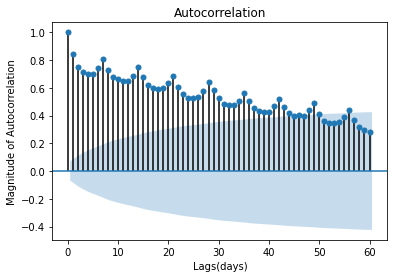

In [45]:
x=plot_acf(lang_data.transpose().de,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

This one also follows the same trend- higher corelation for 7 days lag.

Conclusion- Like many other plots, it also has weekly seasonality.

Next plot is for frequency and amplitude of daily traffic on German language wikipedia.

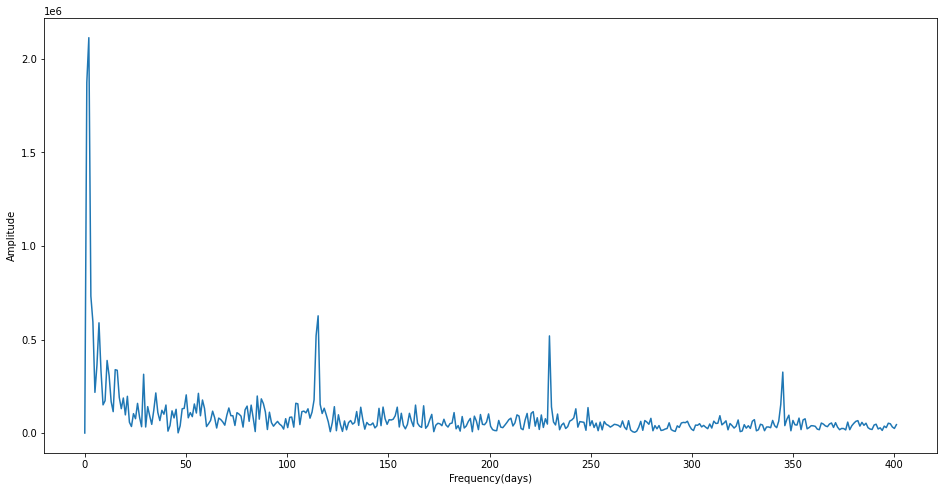

In [46]:
data=lang_data.transpose().de.values[1:] # This is the data that we are going to transform to analyse the frequency domain
data=data-np.mean(data) # At frequency bin 0, we get the mean value of our signal. In order to remove that we are subtracting mean of the data from every datapoint
x=fft.fft(data) #Fourier Transformation
freq=np.linspace(0,803//2,803//2) # According to shannon, we can only analyse the frequency of half of the sample, this function creates evenly spaced numbers which will be used as frequency in plot
y=2/803*np.abs(x[0:803//2]) # Taking absolute values of half data points 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

As expected there are peaks at 120 and 230 but surprisingly at around 340 days, there is a peak.

Conclusion- Like previous plots, this also shows 120 days seasonality.

Next plot is for daily traffic on Chinese language wikipedia.

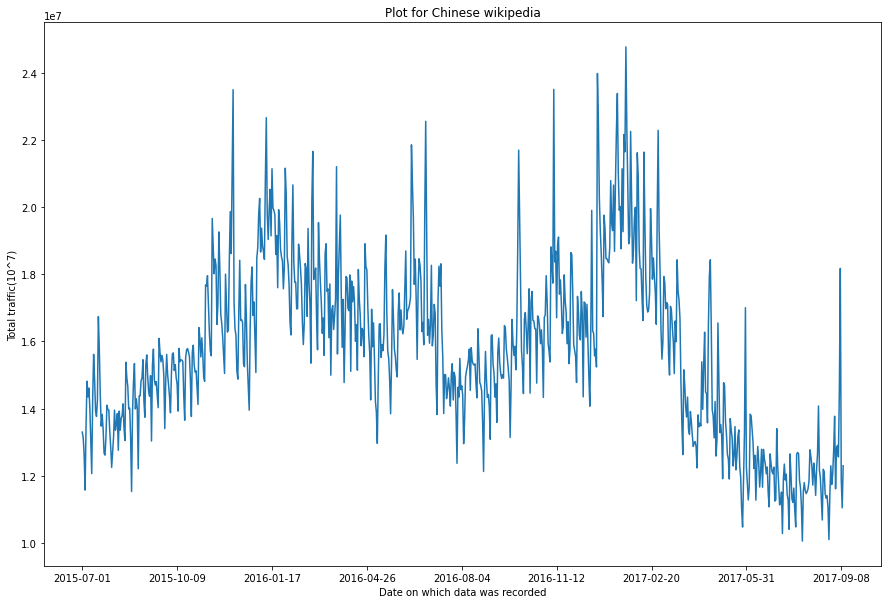

In [47]:
lang_data.iloc[1].transpose().plot(figsize=(15,10),title='Plot for Chinese wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

Like other languages this one also has upward trend during the first few months, we can see a very large spike during January 2016



Next plot is for autocorrelation of daily traffic on Chinese language wikipedia.

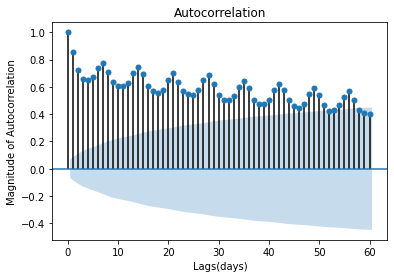

In [48]:
x=plot_acf(lang_data.transpose().zh,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

This plot is no different than others, high value for 7 days lag.

Conclusion- There is weekly seasonality in this data also.

Next plot is for frequency and amplitude of daily traffic on Chinese language wikipedia.

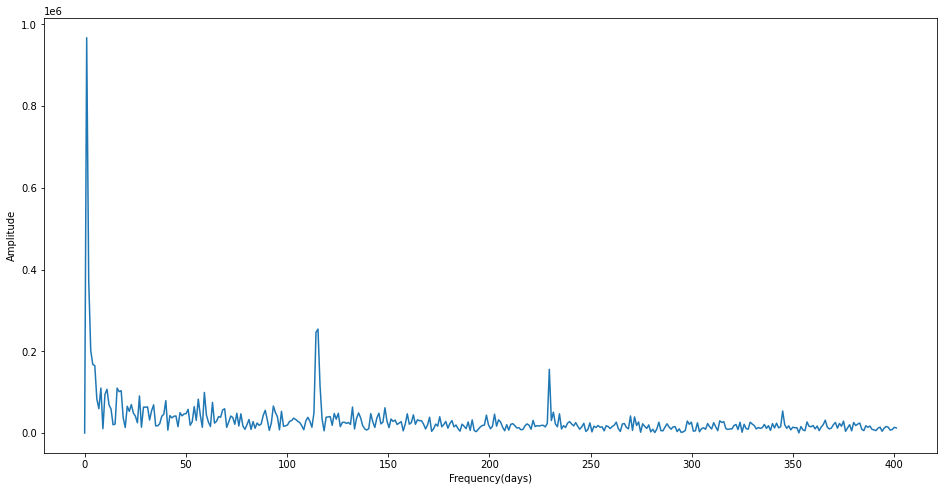

In [49]:
data=lang_data.transpose().zh.values[1:] # This is the data that we are going to transform to analyse the frequency domain
data=data-np.mean(data) # At frequency bin 0, we get the mean value of our signal. In order to remove that we are subtracting mean of the data from every datapoint
x=fft.fft(data) #Fourier Transformation
freq=np.linspace(0,803//2,803//2) # According to shannon, we can only analyse the frequency of half of the sample, this function creates evenly spaced numbers which will be used as frequency in plot
y=2/803*np.abs(x[0:803//2]) # Taking absolute values of half data points 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

Very similar to previous language plot except that it has a comparitively smaller peak at 340 days.

Conclusion- There is seasonality of 120 and 230 days also.

Next plot is for daily traffic on French language wikipedia.

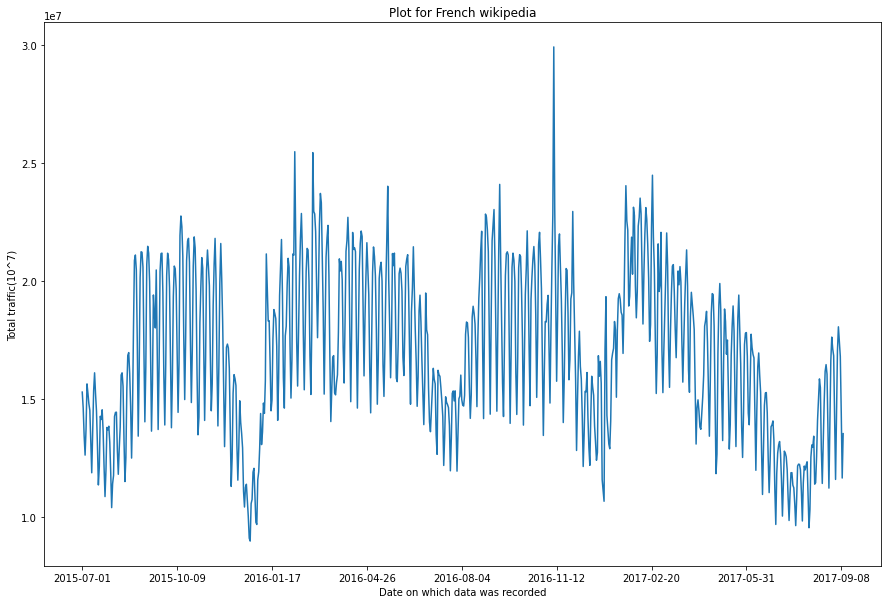

In [50]:
lang_data.iloc[6].transpose().plot(figsize=(15,10),title='Plot for French wikipedia')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

French wikipedia shows upward trend first and then after January 2017 it goes downward. Spikes can also be seen regularly but there is a large spike around March 2016.

Next plot is for autocorrelation of daily traffic on French language wikipedia.

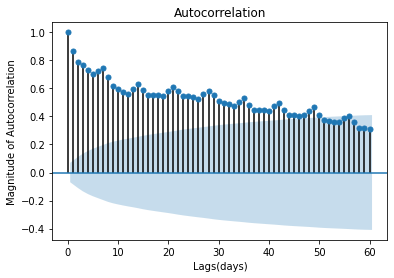

In [51]:
x=plot_acf(lang_data.transpose().fr,lags=60)
plt.xlabel('Lags(days)')
plt.ylabel('Magnitude of Autocorrelation')
plt.show()

As expected, high corealtion for 7 days.

Conclusion- There is weekly seasonality in data.

Next plot is for frequency and amplitude for French wikipedia.

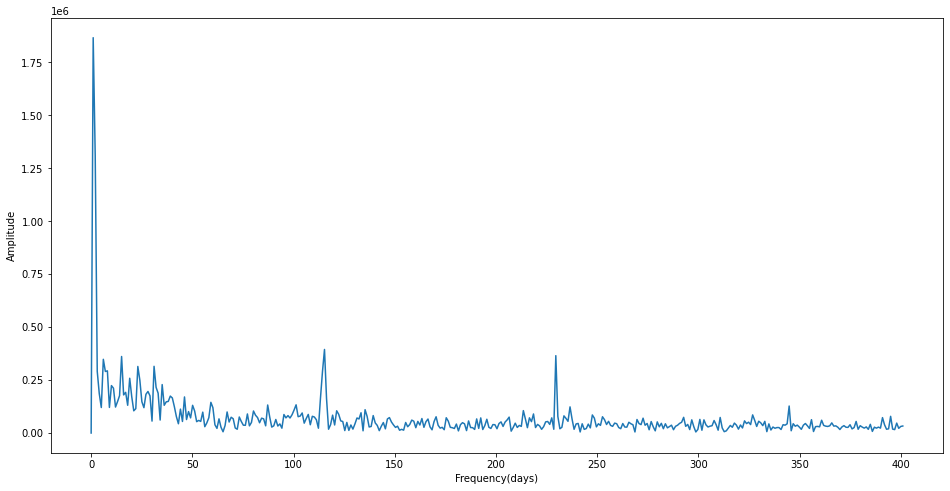

In [52]:
data=lang_data.transpose().fr.values[1:] # This is the data that we are going to transform to analyse the frequency domain
data=data-np.mean(data) # At frequency bin 0, we get the mean value of our signal. In order to remove that we are subtracting mean of the data from every datapoint
x=fft.fft(data) #Fourier Transformation
freq=np.linspace(0,803//2,803//2) # According to shannon, we can only analyse the frequency of half of the sample, this function creates evenly spaced numbers which will be used as frequency in plot
y=2/803*np.abs(x[0:803//2]) # Taking absolute values of half data points 
plt.figure(figsize=(16,8))
plt.xlabel('Frequency(days)')
plt.ylabel('Amplitude')
plt.plot(freq,y)
plt.show()

This is also very similar to previous plot, peaks at 120,230 and 340 days.

Conclusion- This also shows seasonality for 120 and 230 days.

* After analyzing traffic on all the languages, we see that most of the language wiki shows upward trend during first few months and similarly most of the laguage shows downward trend during last few months. This doesn't mean that all our time series are similar, as we have already seen in our vary first plot that language do have an influence on traffic on pages. By analyzing this, we can say that using language as a feature can be helpful during the modelling part.





* Coming to the corelation plots, we saw that most of the language plots shows better corelation value for the 7 days lag except the Russian wiki and Wikimedia but as we saw in the very first plot of the case study that wikimedia has a very small traffic, so we can make exception for Russian wiki. So, we conclude that using a lag of 7 days for our basic statistics models can produce good results.







* Fourier transformation also provided some useful insights, most of the language had peaks at 120 and 230 days while some also had peaks at 340 days. So, these 3 peaks information can later be used during modelling.







**EDA on dividing the dataset in three parts**

In [53]:
#As we saw that almost every time series have three parts, upward trend for first few months then no trend for few months and then downward trend for last few months
# so,accordingle we will divide our time series data into three parts- till Dec 2015, Jan 2016- Jan 2017, Feb 2017- Sep 2017
# After that we will take median of every time series in above three different parts and analyze them
# First part will be of 184 days, second- 397 days, third-222 days
part1_med=[]
part2_med=[]
part3_med=[]
for i in tnrange(len(Page_name)):
  part1_med.append(np.median(train_data.iloc[i].values[1:185]))
  part2_med.append(np.median(train_data.iloc[i].values[185:582]))
  part3_med.append(np.median(train_data.iloc[i].values[582:805]))


In [54]:
med_data=pd.DataFrame([part1_med,part2_med,part3_med],index=['part1','part2','part3'])

In [55]:
med_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,145023,145024,145025,145026,145027,145028,145029,145030,145031,145032,145033,145034,145035,145036,145037,145038,145039,145040,145041,145042,145043,145044,145045,145046,145047,145048,145049,145050,145051,145052,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
part1,11.0,15.0,3.0,10.0,0.0,9.0,0.0,25.0,23.0,14.0,2.0,7.5,3.0,0.0,28.0,18.0,17.0,8.0,13.0,0.0,16.0,10.0,13.0,18.0,0.0,10.0,30.0,1.0,12.5,6.0,9.0,3.0,6.0,7.0,14.0,25.5,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
part2,18.0,19.0,4.0,14.0,4.0,16.0,4.0,37.0,34.0,25.0,13.0,9.0,5.0,13.0,35.0,22.0,24.0,8.0,13.0,4.0,19.0,17.0,15.0,25.0,15.0,16.0,29.0,10.0,22.0,9.0,16.0,5.0,9.0,25.0,17.0,17.0,6.0,9.0,28.0,8.0,...,4.0,0.0,0.0,4.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
part3,22.0,22.0,3.0,17.0,15.0,17.0,7.0,37.0,42.0,26.0,21.0,11.0,6.0,22.0,44.0,36.0,38.0,10.0,13.0,9.0,20.0,19.0,12.0,45.5,38.0,16.0,36.0,10.0,27.5,13.0,15.0,15.0,10.0,27.0,21.0,32.5,5.0,11.0,25.0,7.0,...,7.0,0.5,1.0,10.0,3.0,10.0,3.0,4.0,2.0,7.0,18.0,3.0,2.0,1.0,3.0,8.0,6.0,12.0,4.0,8.0,4.0,7.0,11.0,6.0,3.0,13.0,18.0,2.0,12.0,10.0,5.0,8.0,5.0,17.5,23.0,5.0,8.0,27.0,8.0,11.0


Next plot is the box plot for the 3 parts of the data.

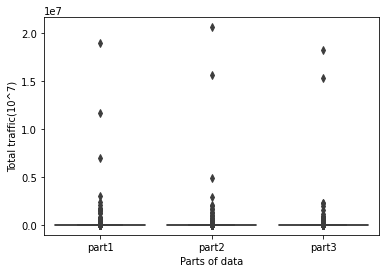

In [56]:
# Box plots for every part of the data 
sns.boxplot(data=med_data.transpose())
plt.xlabel('Parts of data')
plt.ylabel('Total traffic(10^7)')
plt.show()

We can see that most of the data lies under 0.5*10^7 traffic.

Conclusion- These box plots clearly shows us that there are some ouliers present in data which means that there is some time series which has a median >> median of most of the time series.

In [57]:
# This will give us a in-depth look of the medians of the time series
x=[25,50,75,100]
print('For part 1 : ')
for i in x:
  print('{}th percentile of part1 is : '.format(i),np.percentile(part1_med,i))
print('For part 2 : ')
for i in x:
  print('{}th percentile of part2 is : '.format(i),np.percentile(part2_med,i))
print('For part 3 : ')
for i in x:
  print('{}th percentile of part3 is : '.format(i),np.percentile(part3_med,i))

For part 1 : 
25th percentile of part1 is :  6.0
50th percentile of part1 is :  70.0
75th percentile of part1 is :  459.5
100th percentile of part1 is :  18971141.5
For part 2 : 
25th percentile of part2 is :  14.0
50th percentile of part2 is :  119.0
75th percentile of part2 is :  548.0
100th percentile of part2 is :  20575541.0
For part 3 : 
25th percentile of part3 is :  17.5
50th percentile of part3 is :  120.0
75th percentile of part3 is :  517.0
100th percentile of part3 is :  18218663.0


We see that there is a very large difference between 75th and 100th percentile. This follows for every part, lets look more closely in this range.

In [58]:
x=[80,85,90,95,100]
print('For part 1 : ')
for i in x:
  print('{}th percentile of part1 is : '.format(i),np.percentile(part1_med,i))
print('For part 2 : ')
for i in x:
  print('{}th percentile of part2 is : '.format(i),np.percentile(part2_med,i))
print('For part 3 : ')
for i in x:
  print('{}th percentile of part3 is : '.format(i),np.percentile(part3_med,i))

For part 1 : 
80th percentile of part1 is :  633.8000000000029
85th percentile of part1 is :  882.0
90th percentile of part1 is :  1299.5
95th percentile of part1 is :  2302.449999999997
100th percentile of part1 is :  18971141.5
For part 2 : 
80th percentile of part2 is :  727.0
85th percentile of part2 is :  987.0
90th percentile of part2 is :  1436.0
95th percentile of part2 is :  2529.0
100th percentile of part2 is :  20575541.0
For part 3 : 
80th percentile of part3 is :  684.0
85th percentile of part3 is :  926.5
90th percentile of part3 is :  1366.5
95th percentile of part3 is :  2422.449999999997
100th percentile of part3 is :  18218663.0


As we are moving towards the 100th percentile values, we see a reasonable increase in the medians of the time series data but the 100th percentile value seems very large.

In [59]:
# Lets check values between 95-100 percentile range
x=[95,97,98,99,100]
print('For part 1 : ')
for i in x:
  print('{}th percentile of part1 is : '.format(i),np.percentile(part1_med,i))
print('For part 2 : ')
for i in x:
  print('{}th percentile of part2 is : '.format(i),np.percentile(part2_med,i))
print('For part 3 : ')
for i in x:
  print('{}th percentile of part3 is : '.format(i),np.percentile(part3_med,i))

For part 1 : 
95th percentile of part1 is :  2302.449999999997
97th percentile of part1 is :  3431.5699999999924
98th percentile of part1 is :  4563.880000000005
99th percentile of part1 is :  6783.5
100th percentile of part1 is :  18971141.5
For part 2 : 
95th percentile of part2 is :  2529.0
97th percentile of part2 is :  3649.0
98th percentile of part2 is :  4740.760000000009
99th percentile of part2 is :  6976.380000000005
100th percentile of part2 is :  20575541.0
For part 3 : 
95th percentile of part3 is :  2422.449999999997
97th percentile of part3 is :  3576.0
98th percentile of part3 is :  4728.260000000009
99th percentile of part3 is :  7059.660000000033
100th percentile of part3 is :  18218663.0


This also seems reasonable, so the outliers must be present between 99-100th percentile.

In [60]:
# This should provide us a clear picture of what is happening
x=[99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]
for i in x:
  print('{}th percentile of part1 is : '.format(i),np.percentile(part1_med,i))
print('For part 2 : ')
for i in x:
  print('{}th percentile of part2 is : '.format(i),np.percentile(part2_med,i))
print('For part 3 : ')
for i in x:
  print('{}th percentile of part3 is : '.format(i),np.percentile(part3_med,i))

99.1th percentile of part1 is :  7129.5
99.2th percentile of part1 is :  7574.5
99.3th percentile of part1 is :  8176.329999999958
99.4th percentile of part1 is :  8864.070000000065
99.5th percentile of part1 is :  9732.380000000005
99.6th percentile of part1 is :  10833.420000000173
99.7th percentile of part1 is :  11927.384000000078
99.8th percentile of part1 is :  14423.5
99.9th percentile of part1 is :  21252.00100000153
100th percentile of part1 is :  18971141.5
For part 2 : 
99.1th percentile of part2 is :  7373.32600000003
99.2th percentile of part2 is :  7833.0
99.3th percentile of part2 is :  8369.7919999999
99.4th percentile of part2 is :  9071.512000000104
99.5th percentile of part2 is :  9837.070000000007
99.6th percentile of part2 is :  10880.504000000015
99.7th percentile of part2 is :  12676.070000000065
99.8th percentile of part2 is :  15463.503999999957
99.9th percentile of part2 is :  22329.118000002636
100th percentile of part2 is :  20575541.0
For part 3 : 
99.1th p

Upto 99.9th percentile, values seems reasonable but 100th perecentile value is very large. We will take care of this problem in Data Preprocessing section of the case study. For now, to analyze the medians more efficiently, we are removing outliers from the 3 lists we created for medians. During data preprocessing, we will remove them from our main dataset.

In [61]:
# Repalcing the values which are greater than 99.9th percentile with the median of that particular list to better analyze them.
x=[part1_med,part2_med,part3_med]
for k in x:
  per=np.percentile(k,99.9)
  for i in tnrange(len(k)):
    if(k[i]>per):
      k[i]=np.median(k)

Next plot is the box plot of three parts of data after removing outliers.

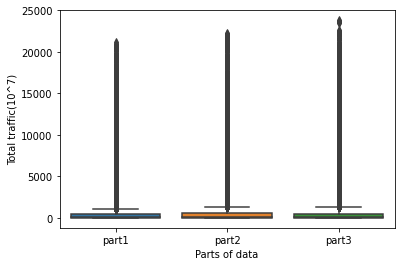

In [62]:
# Box plots after replacing the outliers
med_data=pd.DataFrame([part1_med,part2_med,part3_med],index=['part1','part2','part3'])
sns.boxplot(data=med_data.transpose())
plt.xlabel('Parts of data')
plt.ylabel('Total traffic(10^7)')
plt.show()

We can see that there are very large whiskers in the data.

Conclusion- This plot shows us that most of that 75% of the total values are very small in comparision to last 25% of the values. This holds for every part of the data.

Next three plots are the probability distribution plots for each part of the data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


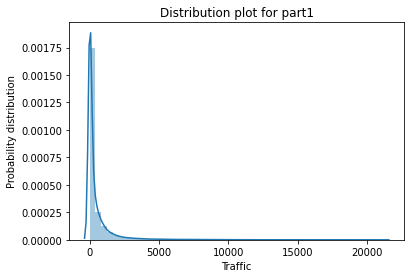

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


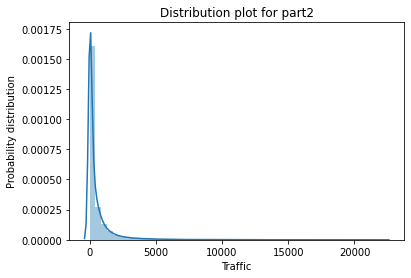

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


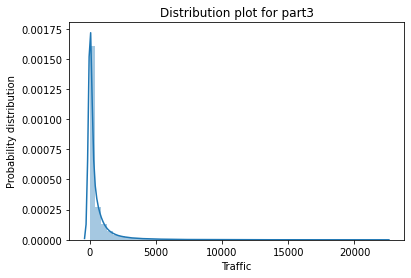

In [63]:
# Lets take a look at the distribution of the medians of each time series based on the parts of the data
ax=sns.distplot(part1_med).set_title('Distribution plot for part1')
plt.xlabel('Traffic')
plt.ylabel('Probability distribution')
plt.show()
ax=sns.distplot(part2_med).set_title('Distribution plot for part2')
plt.xlabel('Traffic')
plt.ylabel('Probability distribution')
plt.show()
ax=sns.distplot(part2_med).set_title('Distribution plot for part3')
plt.xlabel('Traffic')
plt.ylabel('Probability distribution')
plt.show()

This shows that our data is highly skewed and major portion of the data has very small values.

Conclusion- Out of the 145k time series that we have in our dataset, most of the time series has small traffic.

Now, lets check if traffic differ on the basis of bots or actual human traffic. As we know that Page name also includes if the wiki page is accessed by spider or actual human.

**EDA based on spider and non-spider data**

In [64]:
agent_data_list=[]
agent_number=[0,0]
for i in range(2):
  agent_data_list.append(np.zeros(train_data.shape[1]-1))
# This will make two time series from the original dataset, one will be for the total traffic by spider and other for non-spider
for i in tnrange(len(Page_name)):
  add_list=train_data.iloc[i].values[1:]
  if('spider' in Page_name[i]):
    agent_data_list[0]=list(map(add,agent_data_list[0],add_list))
    agent_number[0]=agent_number[0] + 1
  else:
    agent_data_list[1]=list(map(add,agent_data_list[1],add_list))  
    agent_number[1]=agent_number[1] + 1

In [65]:
new_data=pd.DataFrame(agent_data_list,index=['spider_data','nonspider_data'],columns=train_data.columns.values[1:])
new_data.head(10)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
spider_data,664648.0,6.197182e+05,5.952534e+05,6.140900e+05,6.225934e+05,5.838318e+05,6.247570e+05,7.666986e+05,8.090312e+05,7.489709e+05,6.114496e+05,5.581805e+05,7.405780e+05,6.530358e+05,6.840349e+05,7.877437e+05,8.046826e+05,7.002977e+05,1.129662e+06,8.384750e+05,6.131812e+05,7.555004e+05,7.806344e+05,5.632094e+05,5.893989e+05,6.035787e+05,6.224115e+05,6.410031e+05,7.276848e+05,5.395788e+05,8.967824e+05,5.900474e+05,5.978906e+05,5.094094e+05,6.349275e+05,6.011448e+05,7.164870e+05,7.296258e+05,9.626524e+05,7.182624e+05,...,1.882870e+06,1.855865e+06,1.746666e+06,1.771972e+06,1.866263e+06,2.128442e+06,2.470151e+06,1.992342e+06,2.220023e+06,2.074834e+06,2.794434e+06,3.285286e+06,3.324594e+06,5.099108e+06,3.286036e+06,2.716984e+06,2.437787e+06,2.389522e+06,2.615744e+06,2.326500e+06,1.997870e+06,2.543398e+06,2.053167e+06,2.601159e+06,2.138847e+06,2.534032e+06,2.654856e+06,2.879333e+06,3.449007e+06,4.126703e+06,5.503972e+06,4.764063e+06,6.860902e+06,5.904790e+06,4.911762e+06,9.837774e+06,1.408044e+07,2121145.5,1984908.0,1993852.0
nonspider_data,148007828.0,1.489768e+08,1.405712e+08,1.450017e+08,1.508757e+08,1.601614e+08,1.535283e+08,1.480993e+08,1.487280e+08,1.476312e+08,1.447076e+08,1.609260e+08,1.613591e+08,1.614057e+08,1.513133e+08,1.529993e+08,1.507056e+08,1.451407e+08,1.514340e+08,1.566547e+08,1.495681e+08,1.487960e+08,1.433468e+08,1.358286e+08,1.333746e+08,1.432386e+08,1.478000e+08,1.454715e+08,1.609280e+08,1.364499e+08,1.311284e+08,1.269190e+08,1.388316e+08,1.371983e+08,1.511060e+08,1.500606e+08,1.512157e+08,1.510452e+08,1.445386e+08,1.517582e+08,...,1.385264e+08,1.349420e+08,1.308010e+08,1.307585e+08,1.418029e+08,1.475950e+08,1.447627e+08,1.452810e+08,1.420121e+08,1.345364e+08,1.397600e+08,1.460230e+08,1.494994e+08,1.530980e+08,1.510975e+08,1.453027e+08,1.363628e+08,1.349959e+08,1.455344e+08,1.506264e+08,1.452979e+08,1.459520e+08,1.388833e+08,1.352513e+08,1.375247e+08,1.540317e+08,1.588192e+08,1.510935e+08,1.451023e+08,1.446852e+08,1.418085e+08,1.407469e+08,1.598318e+08,1.615158e+08,1.579072e+08,1.631440e+08,1.672808e+08,135259756.5,131003564.0,147578102.0


Next plot is for traffic on pages based on spider and nonspider data.

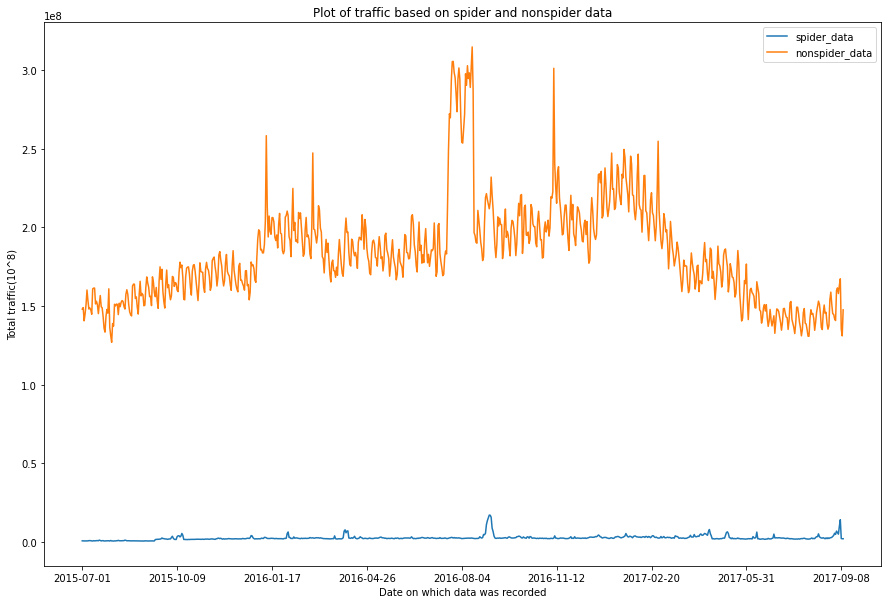

In [66]:
# plot of the data based on spider and non-spider
new_data.transpose().plot(figsize=(15,10),title='Plot of traffic based on spider and nonspider data')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()

We can clearly see the pattern in nonspider data but spider data is almost a flat line but in actual it should not be.

Conclusion- This implies that the scale of spider and non-spider data is very different.

In [67]:
#We saw from above plots that scale of spider and non spider data differ at a large scale, let's check the median of both of these categories,
#this should give us an idea of at what scale they differ 
print('Median of spider data is : ',np.median(new_data.transpose().spider_data))
print('Median of nonspider data is : ',np.median(new_data.transpose().nonspider_data))

Median of spider data is :  2293167.7725817673
Median of nonspider data is :  180454589.36525816


These differ at a scale of 10^2, it is a large difference. This may be due to the fact that generally whenever we need any information from the wikipedia, we directly access the wiki page instead of using a web scrawler. Web scrapping or web scrawler is generally used only when we need to extract a large amount of data at once.

Next plot is the bar plot of access of pages.

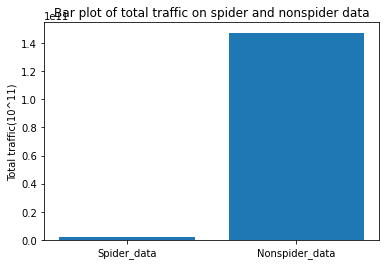

In [68]:
# Lets take a look on the total traffic bys apider and non-spider during 803 days
a=np.sum(new_data.transpose().spider_data)
b=np.sum(new_data.transpose().nonspider_data)
plt.bar(['Spider_data','Nonspider_data'],[a,b])
plt.title('Bar plot of total traffic on spider and nonspider data')
plt.ylabel('Total traffic(10^11)')
plt.show()

This plot makes it more clear, total traffic on spider data is almost negligible in comparision to nonspider data.

Next plot is of daily traffic on spider data.

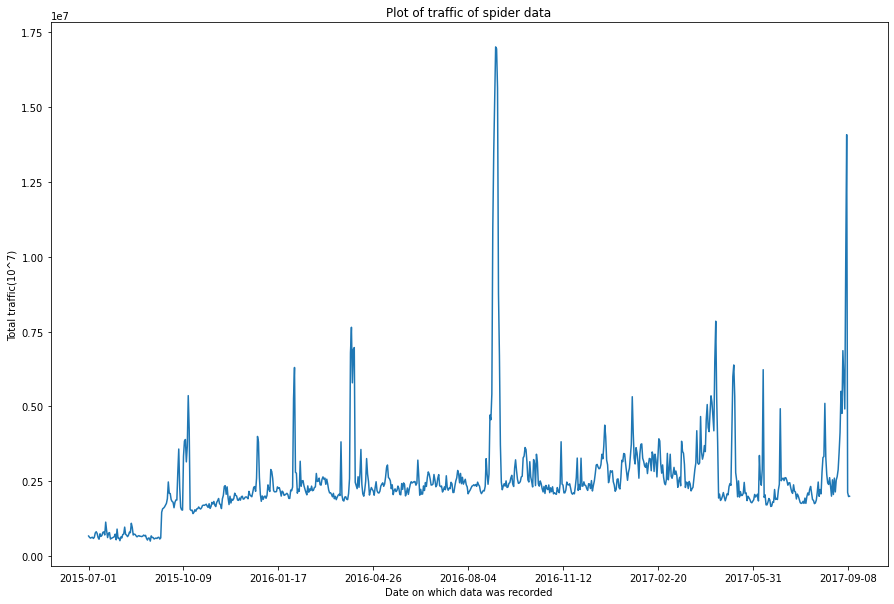

In [69]:
# Lets plot them individually to understand the pattern more clearly
new_data.iloc[0].transpose().plot(figsize=(15,10),title='Plot of traffic of spider data')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^7)')
plt.show()

This generally doesn't show any upward or downward trend but we can see that the scale of traffic has increased after September 2015 and regular spikes can also be seen in data. There are also two very large spikes in data during September 2016 and September 2015.

Next plot is of daily traffic on nonspider data.

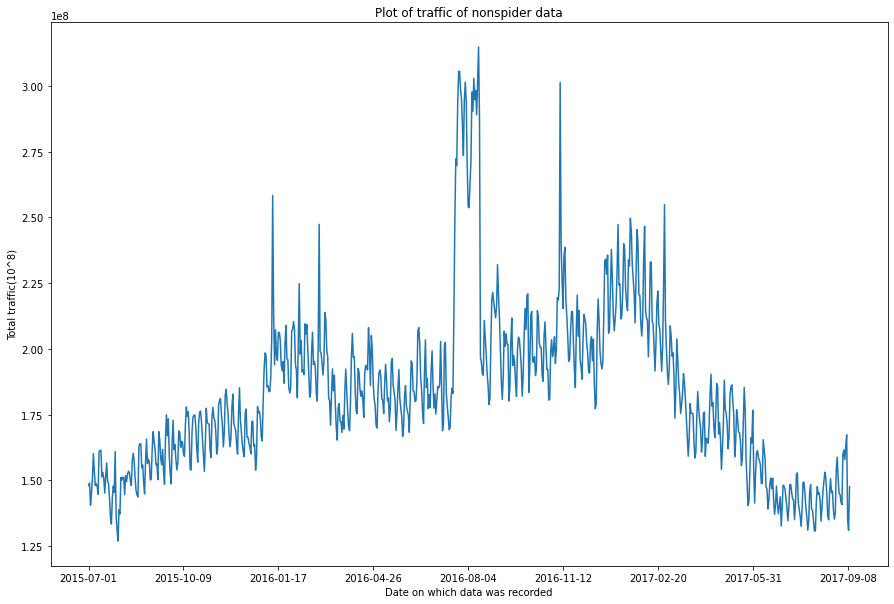

In [70]:
new_data.iloc[1].transpose().plot(figsize=(15,10),title='Plot of traffic of nonspider data')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()

This graph is somewhat similar to English wikipedia graph, this is because of the fact that English Wiki had large traffic and it also dominates in this graph. As we have seen in all the language based graph, there is an upward trend in the first few months and downward trend in the last few months.Also similar to English wiki, it also show a pattern during January 2015 and a very large spike during August 2016,there is also a spike in data in November 2016.

Conclusion- Most of the data is non spider.

**EDA based on access of wikipedia page**

Page name of the data has one more information, if the page is accessed by mobile,desktop or all access.So, lets analyze them accordingly.



In [71]:
#This will create three time series of the data each of them corresponds to the total traffic on a particular type of access.
access_data_list=[]
access_number=[0,0,0]
for i in range(3):
  access_data_list.append(np.zeros(train_data.shape[1]-1))
import re
for i in tnrange(len(Page_name)):
  add_list=train_data.iloc[i].values[1:]
  k=max([i.start() for i in re.finditer('org_',Page_name[i])])   #https://www.geeksforgeeks.org/python-all-occurrences-of-substring-in-string/
  if('all-access' in Page_name[i][k:]):
    access_data_list[0]=list(map(add,access_data_list[0],add_list))
    access_number[0]=access_number[0] + 1
  if('desktop' in Page_name[i][k:]):
    access_data_list[1]=list(map(add,access_data_list[1],add_list))
    access_number[1]=access_number[1] + 1
  if('mobile' in Page_name[i][k:]): 
    access_data_list[2]=list(map(add,access_data_list[2],add_list))
    access_number[2]=access_number[2] + 1

In [72]:
access_data=pd.DataFrame(access_data_list,index=['all-accesss','desktop','mobile'],columns=train_data.columns.values[1:])
access_data.head(10)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
all-accesss,74698113.0,7.560885e+07,7.108841e+07,7.348648e+07,7.651705e+07,8.088921e+07,7.752718e+07,7.503832e+07,7.541385e+07,7.476574e+07,7.329631e+07,8.138565e+07,8.171815e+07,8.130868e+07,7.637521e+07,7.746671e+07,7.644369e+07,7.361767e+07,7.734407e+07,7.954780e+07,7.559152e+07,7.536234e+07,7.270251e+07,6.875260e+07,6.768859e+07,7.264723e+07,7.492261e+07,7.364739e+07,8.127798e+07,6.893365e+07,6.654330e+07,6.436156e+07,7.107694e+07,6.938865e+07,7.647355e+07,7.592510e+07,7.656102e+07,7.652348e+07,7.358382e+07,7.707455e+07,...,7.088062e+07,6.920314e+07,6.699899e+07,6.713159e+07,7.270598e+07,7.583949e+07,7.472626e+07,7.452674e+07,7.310853e+07,6.917036e+07,7.249156e+07,7.619322e+07,7.788976e+07,8.140616e+07,7.862285e+07,7.527262e+07,7.060290e+07,6.979005e+07,7.526329e+07,7.753488e+07,7.441036e+07,7.552579e+07,7.141689e+07,7.000317e+07,7.080052e+07,7.942078e+07,8.200037e+07,7.818709e+07,7.574080e+07,7.608390e+07,7.594875e+07,7.476695e+07,8.618983e+07,8.618833e+07,8.363202e+07,9.110234e+07,9.672276e+07,69668164.5,67392777.0,75261740.0
desktop,39876738.0,4.016731e+07,3.587656e+07,3.360103e+07,3.542363e+07,4.342738e+07,4.190522e+07,3.966704e+07,4.013629e+07,3.937523e+07,3.444818e+07,3.781070e+07,4.416733e+07,4.394796e+07,4.121038e+07,4.107212e+07,3.889809e+07,3.426064e+07,3.522832e+07,4.146556e+07,4.007283e+07,4.002024e+07,3.831352e+07,3.513067e+07,3.206774e+07,3.445458e+07,3.940738e+07,3.949560e+07,4.821134e+07,3.669866e+07,3.483286e+07,3.083417e+07,3.300645e+07,3.772670e+07,4.125521e+07,4.106984e+07,4.124511e+07,4.025677e+07,3.542319e+07,3.637127e+07,...,3.892003e+07,3.741795e+07,3.472659e+07,3.123636e+07,3.487714e+07,4.184222e+07,4.145036e+07,4.215958e+07,4.096497e+07,3.650651e+07,3.629024e+07,3.657452e+07,4.248917e+07,4.356923e+07,4.365500e+07,4.146602e+07,3.680002e+07,3.402509e+07,3.589097e+07,4.362174e+07,4.186622e+07,4.147011e+07,3.896986e+07,3.683331e+07,3.464699e+07,3.683416e+07,4.517823e+07,4.384486e+07,4.177530e+07,4.136826e+07,4.003201e+07,3.667187e+07,4.208504e+07,4.629471e+07,4.624510e+07,5.006798e+07,5.326176e+07,36531141.0,31207801.5,35866834.0
mobile,34097625.0,3.382031e+07,3.420146e+07,3.852830e+07,3.955760e+07,3.642862e+07,3.472064e+07,3.416062e+07,3.398690e+07,3.423915e+07,3.757460e+07,4.228781e+07,3.621425e+07,3.680207e+07,3.441175e+07,3.524819e+07,3.616856e+07,3.796264e+07,3.999124e+07,3.647981e+07,3.451692e+07,3.416896e+07,3.311140e+07,3.250858e+07,3.420770e+07,3.674040e+07,3.409242e+07,3.296955e+07,3.216633e+07,3.135713e+07,3.064905e+07,3.231331e+07,3.534614e+07,3.059240e+07,3.401212e+07,3.366684e+07,3.412611e+07,3.499454e+07,3.649422e+07,3.903068e+07,...,3.060865e+07,3.017679e+07,3.082211e+07,3.416250e+07,3.608608e+07,3.204174e+07,3.105619e+07,3.058698e+07,3.015860e+07,3.093433e+07,3.377258e+07,3.654058e+07,3.244505e+07,3.322174e+07,3.210565e+07,3.128108e+07,3.139762e+07,3.357023e+07,3.699586e+07,3.179627e+07,3.101919e+07,3.149946e+07,3.054972e+07,3.101600e+07,3.421603e+07,4.031077e+07,3.429547e+07,3.194087e+07,3.103520e+07,3.135976e+07,3.133171e+07,3.407214e+07,3.841781e+07,3.493755e+07,3.294186e+07,3.181149e+07,3.137677e+07,31181596.5,34

Next plot is for daily traffic based on access

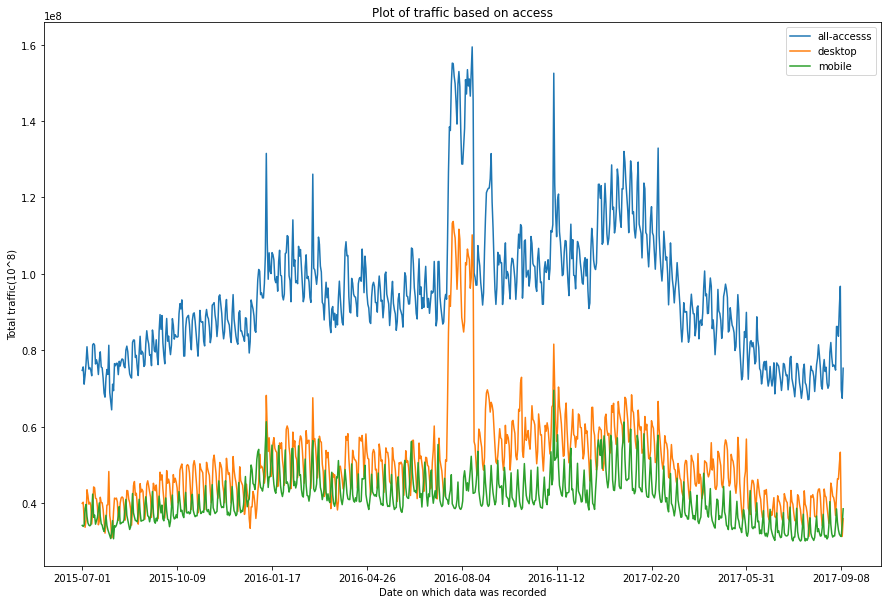

In [73]:
# Plot the 3 type of access on a single plot
access_data.transpose().plot(figsize=(15,10),title='Plot of traffic based on access')
plt.xlabel('Date on which data was recorded')
plt.ylabel('Total traffic(10^8)')
plt.show()

Before plotting this graph, everyone would have expected that all of them will have a pattern very similar to English language wiki or similar to non spider data pattern. Now, we can see that all-access and desktop traffic live upto our expectation but mobile data shows a very different pattern, around August 2016, all-access and desktop data shows a peak just like English wiki but mobile data doesn't show any spike and if we look closely it is actually going down. This pattern is completely opposite of what we expected.

Now, just take a look again at all of the language based plots, you will notice that Spanish and German wikipedia shows similar structure around August 2016, their traffic also goes down.

Conclusion- From this we can conclude that most of the mobile traffic during Aug 2016 is due to the Spanish and German wiki and very less English wiki is accessed on Mobile.

**Which month has more visits on an average ?**

In [74]:
# Here, we will check which month has more visits on an average on each page.
# From here, we will try to check the average number of visitors based on different conditions, all the averages are based on only medians and not mean.
month=[]
for i in tnrange(12):
    k=[]
    month.append(k)
for col in tqdm(train_data.columns[1:]):
    index=int(col.split('-')[1])
    month[index-1].append(np.median(train_data[col].values))

  3%|▎         | 25/803 [00:00<00:03, 247.80it/s]

100%|██████████| 803/803 [00:02<00:00, 281.89it/s]


In [75]:
for i in range(len(month)):
    month[i]=np.median(month[i])
print(month)
print('Month with most number of average visitor is ', month.index(max(month)))

[130.0, 135.0, 130.0, 131.0, 127.0, 123.5, 113.0, 117.0, 115.5, 108.0, 111.0, 112.0]
Month with most number of average visitor is  1


So, index 1 is for February which shows on an average February has most number of visits. In comparision to October which has least number of average visitors, February shows a significant 25 % growth.

**Which day of the week has more visits on an average ?**

In [76]:
# Here, we will check which day of the week has most number of visits on average.
week_day=[]
for i in tnrange(7):
    k=[]
    week_day.append(k)
for col in tqdm(train_data.columns[1:]):
    index=datetime.datetime.strptime(' '.join(col.split('-')), '%Y %m %d').weekday() 
    week_day[index].append(np.median(train_data[col].values))

  3%|▎         | 25/803 [00:00<00:03, 247.98it/s]

100%|██████████| 803/803 [00:02<00:00, 282.42it/s]


In [77]:
for i in range(len(week_day)):
    week_day[i]=np.median(week_day[i])
print(week_day)    
print('Day with maximum average visitors: ',calendar.day_name[week_day.index(max(week_day))])

[126.5, 126.0, 123.0, 122.0, 119.0, 121.0, 130.0]
Day with maximum average visitors:  Sunday


We can see that on an average Sunday has the most number of visitors but all of them are pretty close and don't have much difference.

**Does weekend has more visitors than weekdays on an average ?**

In [78]:
print('Average Visitors on week day : ',np.median(week_day[0]+week_day[1]+week_day[2]+week_day[3]+week_day[4]))
print('Average Visitors on weekend : ',np.median(week_day[5]+week_day[6]))

Average Visitors on week day :  616.5
Average Visitors on weekend :  251.0


We can see that there is not much difference in average visitors on weekday in comparision to weekends. There is only 0.8 % growth in average visitors during weekend but this a very small difference.

Conclusion - Weekdays or weekend doesn't actually make any difference in average number of visitors.

**Which type of client has more traffic on average ?**

In [79]:
#This will create three time series of the data each of them corresponds to the total traffic on a particular type of access.
access_data_list=[]
for i in range(3):
  access_data_list.append([])
for i in tnrange(len(Page_name)):
  add_list=train_data.iloc[i].values[1:]
  k=max([i.start() for i in re.finditer('org_',Page_name[i])])   #https://www.geeksforgeeks.org/python-all-occurrences-of-substring-in-string/
  if('all-access' in Page_name[i][k:]):
    access_data_list[0].append(np.median(add_list))
  if('desktop' in Page_name[i][k:]):
    access_data_list[1].append(np.median(add_list))
  if('mobile' in Page_name[i][k:]): 
    access_data_list[2].append(np.median(add_list))

In [80]:
# Here, we will check which client has most number of average visitors.
for i in range(len(access_data_list)):
    access_data_list[i]=np.median(access_data_list[i])
print('Average traffic by all_access',access_data_list[0])   
print('Average traffic by desktop',access_data_list[1])
print('Average traffic by  mobile',access_data_list[2])

Average traffic by all_access 33.0
Average traffic by desktop 204.0
Average traffic by  mobile 196.0


We can see that there is a small difference in average number of visitors by mobile and desktop. In comparision to mobile, desktop has 4 % more average number of visitors.

**Which type of agent has more traffic on average ?**

In [81]:
agent_data_list=[]
for i in range(2):
  agent_data_list.append([])
# This will make two time series from the original dataset, one will be for the total traffic by spider and other for non-spider
for i in tnrange(len(Page_name)):
  add_list=train_data.iloc[i].values[1:]
  if('spider' in Page_name[i]):
    agent_data_list[0].append(np.median(add_list))
  else:
    agent_data_list[1].append(np.median(add_list))

In [82]:
# Here we will check if spider and non spider traffic has some difference on an average 
for i in range(len(agent_data_list)):
    agent_data_list[i]=np.median(agent_data_list[i])
print('Average traffic by spider data',agent_data_list[0])   
print('Average traffic by non spider data',agent_data_list[1])

Average traffic by spider data 10.0
Average traffic by non spider data 235.0


As we saw during data analysis, this result also shows that most of the traffic is by actual human and not bots.

**Which language has more traffic on average ?**

In [83]:
# Creating a list which contains 8 list(total number of laguage + wikimedia) and filling each list with 803 zeros as we have data for total 803 days
data_list=[]
for i in range(len(lang_list)):
  data_list.append([])

In [84]:
for i in tnrange(len(Page_name)):
  index=Page_name[i].find('.wikipedia')
  temp=lang_list.index(Page_name[i][index-1:index-3:-1][::-1])
  add_list=train_data.iloc[i].values[1:]
  data_list[temp].append(np.median(add_list))

In [85]:
# During data analysis we saw that in total English language has most traffic but let's check which language has most visitors on an average.
for i in range(len(data_list)):
    data_list[i]=np.median(data_list[i])
i=0    
for k in lang_list:
    print(f'Average traffic by {k} language',data_list[i])
    i=i+1

Average traffic by ru language 258.0
Average traffic by de language 42.0
Average traffic by nt language 13.0
Average traffic by ja language 176.0
Average traffic by zh language 75.0
Average traffic by fr language 121.0
Average traffic by es language 346.0
Average traffic by en language 298.0


We can see that English language has most number of average visitors compared to any another language and media pages has least number of average visitors.

**Which client has more traffic based on language ?**

In [86]:
data_list=[]
for i in range(len(lang_list)):
  data_list.append([[],[],[]])

In [87]:
for i in tnrange(len(Page_name)):
  index=Page_name[i].find('.wikipedia')
  temp=lang_list.index(Page_name[i][index-1:index-3:-1][::-1])
  add_list=train_data.iloc[i].values[1:]
  k=max([j.start() for j in re.finditer('org_',Page_name[i])])   #https://www.geeksforgeeks.org/python-all-occurrences-of-substring-in-string/
  if('all-access' in Page_name[i][k:]):
    data_list[temp][0].append(np.median(add_list))
  if('desktop' in Page_name[i][k:]):
    data_list[temp][1].append(np.median(add_list))
  if('mobile' in Page_name[i][k:]): 
    data_list[temp][2].append(np.median(add_list))

In [88]:
for i in range(len(data_list)):
    for j in range(3):
        data_list[i][j]=np.median(data_list[i][j])
i=0    
a=['all_access','desktop','mobile']
for k in lang_list:
    j=0
    for t in a:
        print(f'Average traffic by {k} language on {t}',data_list[i][j])
        j=j+1
    print('*' * 50)    
    i=i+1

Average traffic by ru language on all_access 39.0
Average traffic by ru language on desktop 430.0
Average traffic by ru language on mobile 314.0
**************************************************
Average traffic by de language on all_access 8.0
Average traffic by de language on desktop 152.5
Average traffic by de language on mobile 173.0
**************************************************
Average traffic by nt language on all_access 25.0
Average traffic by nt language on desktop 24.0
Average traffic by nt language on mobile 2.0
**************************************************
Average traffic by ja language on all_access 99.0
Average traffic by ja language on desktop 157.5
Average traffic by ja language on mobile 361.0
**************************************************
Average traffic by zh language on all_access 21.0
Average traffic by zh language on desktop 134.0
Average traffic by zh language on mobile 87.0
**************************************************
Average traffic by fr lan

As we saw earlier, desktop has a little edge over mobiles but same is not the case with Japanese language, mobile has almost double average visitors in comparision to desktop.

**Which agent has more traffic based on language ?**

In [89]:
data_list=[]
for i in range(len(lang_list)):
  data_list.append([[],[]])

In [90]:
for i in tnrange(len(Page_name)):
  index=Page_name[i].find('.wikipedia')
  temp=lang_list.index(Page_name[i][index-1:index-3:-1][::-1])
  add_list=train_data.iloc[i].values[1:]
  if('spider' in Page_name[i]):
    data_list[temp][0].append(np.median(add_list))
  else:
    data_list[temp][1].append(np.median(add_list))

In [91]:
# During data analysis we saw that in total English language has most traffic but let's check which language has most visitors on an average.
for i in range(len(data_list)):
    for j in range(2):
        data_list[i][j]=np.median(data_list[i][j])
i=0    
a=['spider','non_spider']
for k in lang_list:
    j=0
    for t in a:
        print(f'Average traffic by {k} language on {t}',data_list[i][j])
        j=j+1
    print('*' * 50)    
    i=i+1

Average traffic by ru language on spider 13.0
Average traffic by ru language on non_spider 453.0
**************************************************
Average traffic by de language on spider 5.0
Average traffic by de language on non_spider 215.5
**************************************************
Average traffic by nt language on spider nan
Average traffic by nt language on non_spider 13.0
**************************************************
Average traffic by ja language on spider 31.0
Average traffic by ja language on non_spider 307.0
**************************************************
Average traffic by zh language on spider 9.0
Average traffic by zh language on non_spider 136.0
**************************************************
Average traffic by fr language on spider 6.0
Average traffic by fr language on non_spider 223.0
**************************************************
Average traffic by es language on spider 10.0
Average traffic by es language on non_spider 693.5
********************

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


We can see that most of the traffic is by actual human for every language and interestingly for media pages, all of the traffic is only from actual human.

**Does holiday season affects number of average visitors ?**

In [92]:
# As we know that last 3 month of the year has most number of festivals all over the world. Lets check if it affects the average visitors.
month=[]
for i in tnrange(2):
    month.append([])
for col in tqdm(train_data.columns[1:]):
    index=int(col.split('-')[1])
    if(index<10):
        month[0].append(np.median(train_data[col].values))
    else:
        month[1].append(np.median(train_data[col].values))

  0%|          | 0/803 [00:00<?, ?it/s]

100%|██████████| 803/803 [00:02<00:00, 274.63it/s]


In [93]:
for i in range(len(month)):
    month[i]=np.median(month[i])
print(month)

[123.0, 112.0]


We can see there is some difference here. There is actually 7.3 % dip in average number of visitors during holiday season.

Conclusion- We can say that it actually make difference, during the holiday season, wikipedia pages has less traffic in comparision to other months of the year.

**DATA PREPROCESSING**

In [94]:
#As we saw during data analysis that usually peaks are present at regular intervals and there are very less number of peaks that are very large and occur only once or twice
# These peaks will not be useful for prediction, so we are replacing all these peaks with the median of the data
col=train_data.columns
for i in tnrange(train_data.shape[0]):
    k=train_data.iloc[i].values[1:]
    threshold=np.percentile(k,99.8)
    med=np.median(k)
    for j in col[1:]:
        if(train_data.at[i,j]>threshold):
            train_data.at[i,j]=med

In [95]:
train_data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,14.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


**FEATURE ENGINEERING**

In [96]:
train_data=train_data.drop(columns=['Page'])

In [97]:
indices = np.random.permutation(train_data.shape[0]) # Shuffling indexes of data
# As we have more than 145k time series, we are using only 50% of data to train the model.
idx=indices[:int(0.50*train_data.shape[0])]

For evaluating our model, we will use Mean Absolute Error(MAE) on log1p of data. After final predictions we will use expm1 on data to convert it back to original form.

In [98]:
#Along with the time series, we will use the three features as well that we can extract from the page name
x_train=[]
y_train=[]
lang=[] # This will contain the language of the page
spider=[] # this will contain if the page was accessed by spider or by actual human
access=[] #This will contain the client that was used to access the page
import re
for i in tqdm(idx):
    k=np.log1p(train_data.iloc[i].values[-264:]) # Taking last 264 days of data and converting it to log1p.
    x_train.append(k[:200]) # We will use 200 days of data for training and rest 64 days as our target values.
    y_train.append(k[200:])

    index=Page_name[i].find('.wikipedia')
    lang.append(Page_name[i][index-1:index-3:-1][::-1])

    if('spider' in Page_name[i]):
        spider.append('spider')
    else:
        spider.append('non-spider') 
 
    k=max([i.start() for i in re.finditer('org_',Page_name[i])])   #https://www.geeksforgeeks.org/python-all-occurrences-of-substring-in-string/
    if('all-access' in Page_name[i][k:]):
        access.append('all_access')
    if('desktop' in Page_name[i][k:]):
        access.append('desktop')
    if('mobile' in Page_name[i][k:]): 
        access.append('mobile')

100%|██████████| 72531/72531 [00:09<00:00, 8028.19it/s]


In [99]:
# Reshaping the data in order to feed it to the model
x=np.array(x_train).reshape(len(idx),200,1)
y=np.array(y_train).reshape(len(idx),64)

In [100]:
x.shape

(72531, 200, 1)

In [101]:
y.shape

(72531, 64)

In [102]:
# As we have a total of 72531 data points, we will use 50000 for training
x_train=x[:50000]
y_train=y[:50000]
x_test=x[50000:]
y_test=y[50000:]

In [103]:
from sklearn.preprocessing import LabelEncoder
# Label encoding each of the categorical feature
access_enc=LabelEncoder()
access=access_enc.fit_transform(access)

lang_enc=LabelEncoder()
lang=lang_enc.fit_transform(lang)

spider_enc=LabelEncoder()
spider=spider_enc.fit_transform(spider)

In [104]:
access_train=access[:50000] # Splitting into train and test
access_test=access[50000:]

lang_train=lang[:50000]
lang_test=lang[50000:]

spider_train=spider[:50000]
spider_test=spider[50000:]

In [105]:
# Reshaping
access_train=access_train.reshape(len(access_train),1)
access_test=access_test.reshape(len(access_test),1)
lang_train=lang_train.reshape(len(lang_train),1)
lang_test=lang_test.reshape(len(lang_test),1)
spider_train=spider_train.reshape(len(spider_train),1)
spider_test=spider_test.reshape(len(spider_test),1)

Now, our data is ready and we can start building our model architecture. Model will have 4 input layers(one for each feature), time series data will go through LSTM layer and all the label encoded features will go through an embedding layer and then we will flatten the output so that we can concatenate all these layers . After that we will use dense layer and an output layer.

**FITTING INTO LSTM MODEL**

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,Activation,LSTM,RepeatVector,TimeDistributed,Flatten,Conv1D,Conv2D,Embedding,Concatenate

In [107]:
input_layer=Input(shape=(x_train.shape[1],x_train.shape[2]))
x=LSTM(100)(input_layer)
input_layer1=Input(shape=(access_train.shape[1],))
x1=Embedding(input_dim=3,output_dim=3)(input_layer1)
x1=Flatten()(x1)
input_layer2=Input(shape=(lang_train.shape[1],))
x2=Embedding(input_dim=8,output_dim=8)(input_layer2)
x2=Flatten()(x2)
input_layer3=Input(shape=(spider_train.shape[1],))
x3=Embedding(input_dim=2,output_dim=2)(input_layer3)
x3=Flatten()(x3)
concat=Concatenate()([x,x1,x2,x3])
x=Dense(264,activation='relu')(concat)
x=Dense(128,activation='relu')(x)

output=Dense(64)(x)
model=Model(inputs=[input_layer,input_layer1,input_layer2,input_layer3],outputs=output)
optimizer=tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='mae')
model.fit([x_train,access_train,lang_train,spider_train], y_train, validation_data=([x_test,access_test,lang_test,spider_test],y_test),epochs=300, batch_size=64)

Epoch 1/300
782/782 [==============================] - 43s 14ms/step - loss: 0.8432 - val_loss: 0.3716
Epoch 2/300
782/782 [==============================] - 10s 13ms/step - loss: 0.3762 - val_loss: 0.3624
Epoch 3/300
782/782 [==============================] - 10s 13ms/step - loss: 0.3648 - val_loss: 0.3560
Epoch 4/300
782/782 [==============================] - 10s 13ms/step - loss: 0.3551 - val_loss: 0.3559
Epoch 5/300
782/782 [==============================] - 10s 13ms/step - loss: 0.3503 - val_loss: 0.3587
Epoch 6/300
782/782 [==============================] - 10s 13ms/step - loss: 0.3469 - val_loss: 0.3406
Epoch 7/300
782/782 [==============================] - 10s 13ms/step - loss: 0.3433 - val_loss: 0.3546
Epoch 8/300
782/782 [==============================] - 10s 13ms/step - loss: 0.3444 - val_loss: 0.3390
Epoch 9/300
782/782 [==============================] - 10s 13ms/step - loss: 0.3423 - val_loss: 0.3365
Epoch 10/300
782/782 [==============================] - 10s 13ms/step - l

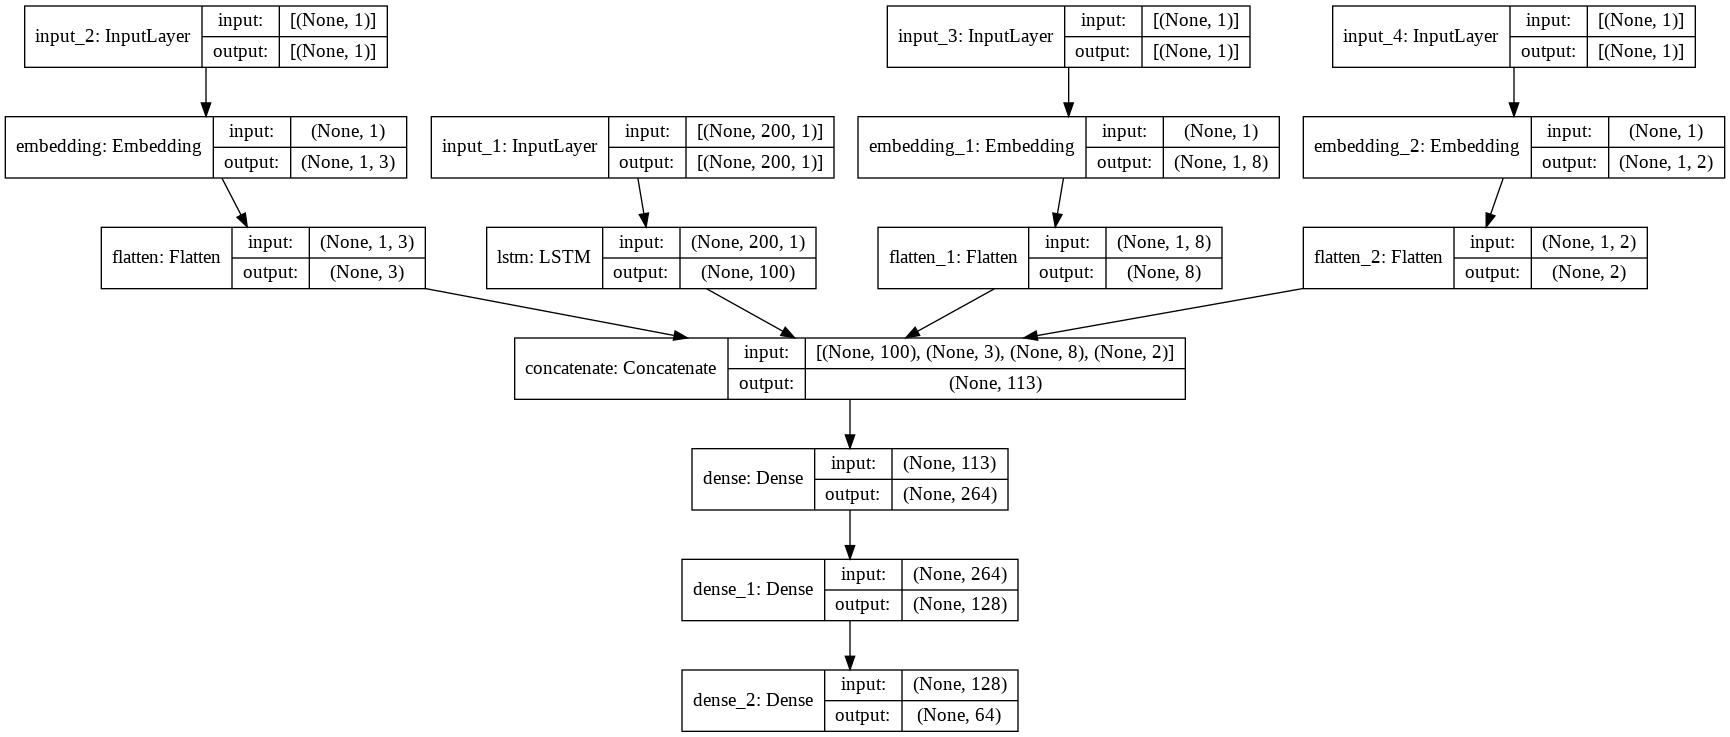

In [108]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

LSTM is a good choice for a time series problem because they are specialised in seq-seq prediction.